In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-prediction-dataset/yield.csv
/kaggle/input/crop-yield-prediction-dataset/temp.csv
/kaggle/input/crop-yield-prediction-dataset/rainfall.csv
/kaggle/input/crop-yield-prediction-dataset/pesticides.csv
/kaggle/input/crop-yield-prediction-dataset/yield_df.csv


import all the librarires that we are going to utilize

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit

from tensorflow import keras
from tensorflow.keras import layers, Input

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

Read CSV file and display head

In [5]:
cropData = pd.read_csv('/kaggle/input/crop-yield-prediction-dataset/yield_df.csv')
print(cropData.head())

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


In [6]:
summary = cropData.describe()
print(summary)

         Unnamed: 0          Year    hg/ha_yield  \
count  28242.000000  28242.000000   28242.000000   
mean   14120.500000   2001.544296   77053.332094   
std     8152.907488      7.051905   84956.612897   
min        0.000000   1990.000000      50.000000   
25%     7060.250000   1995.000000   19919.250000   
50%    14120.500000   2001.000000   38295.000000   
75%    21180.750000   2008.000000  104676.750000   
max    28241.000000   2013.000000  501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                    28242.00000       28242.000000  28242.000000  
mean                      1149.05598       37076.909344     20.542627  
std                        709.81215       59958.784665      6.312051  
min                         51.00000           0.040000      1.300000  
25%                        593.00000        1702.000000     16.702500  
50%                       1083.00000       17529.440000     21.510000  
75%                       1

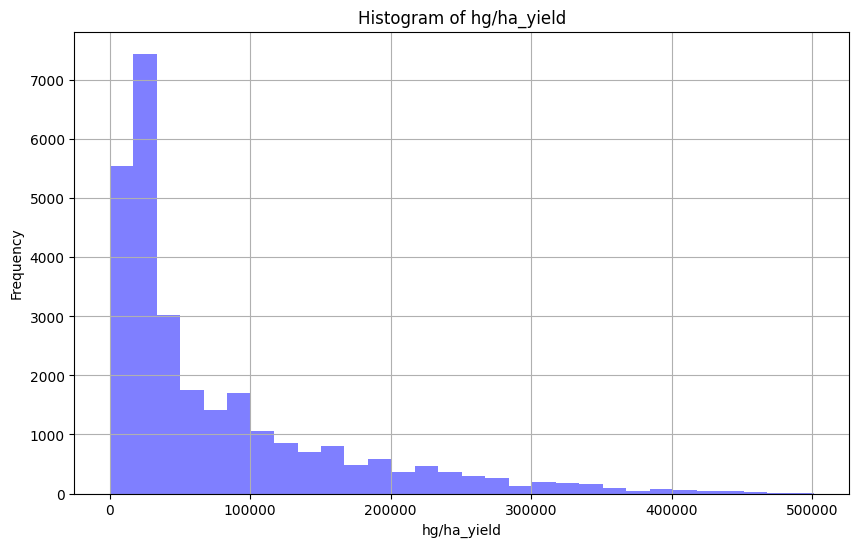

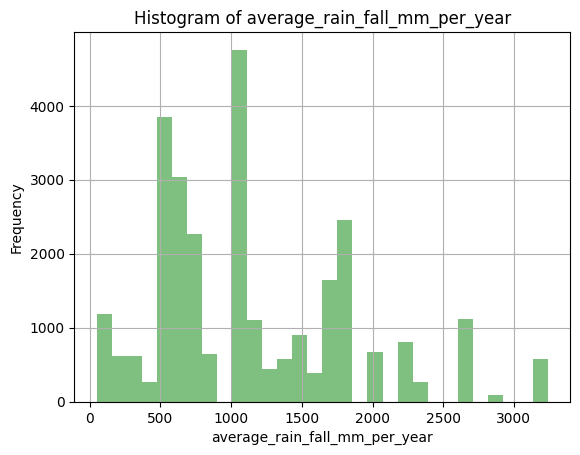

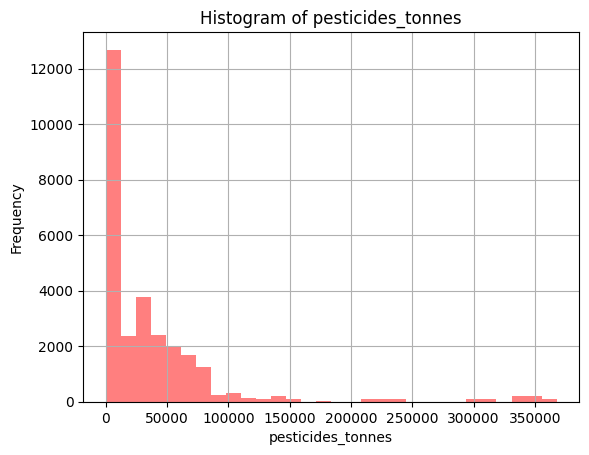

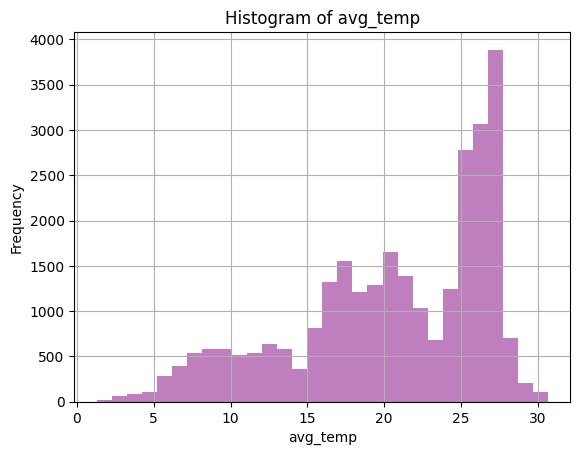

In [6]:
plt.figure(figsize=(10, 6))

# Histograms
cropData['hg/ha_yield'].hist(bins=30, alpha=0.5, color='blue')
plt.title('Histogram of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()



# for average rain fall per year
cropData['average_rain_fall_mm_per_year'].hist(bins=30, alpha=0.5, color='green')
plt.title('Histogram of average_rain_fall_mm_per_year')
plt.xlabel('average_rain_fall_mm_per_year')
plt.ylabel('Frequency')
plt.show()



# for perticides
cropData['pesticides_tonnes'].hist(bins=30, alpha=0.5, color='red')
plt.title('Histogram of pesticides_tonnes')
plt.xlabel('pesticides_tonnes')
plt.ylabel('Frequency')
plt.show()

# for average temperature
cropData['avg_temp'].hist(bins=30, alpha=0.5, color='purple')
plt.title('Histogram of avg_temp')
plt.xlabel('avg_temp')
plt.ylabel('Frequency')
plt.show()

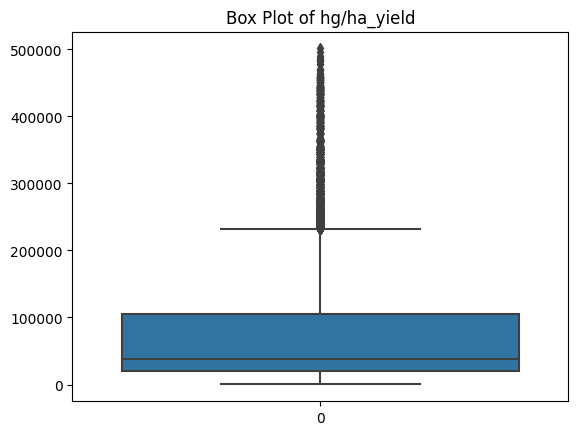

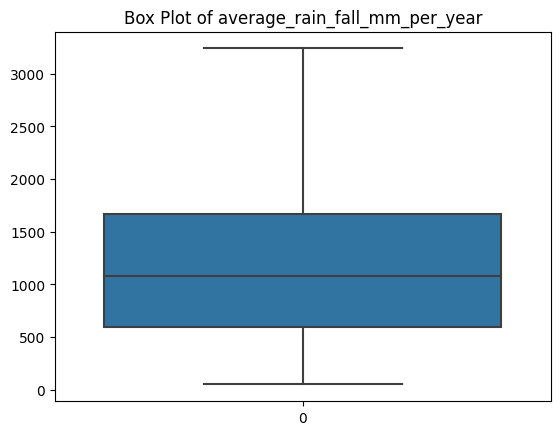

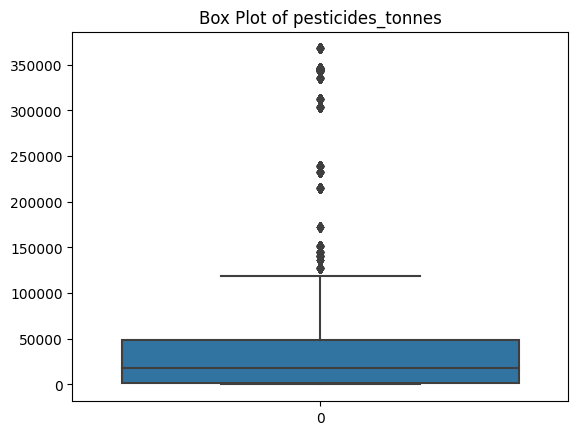

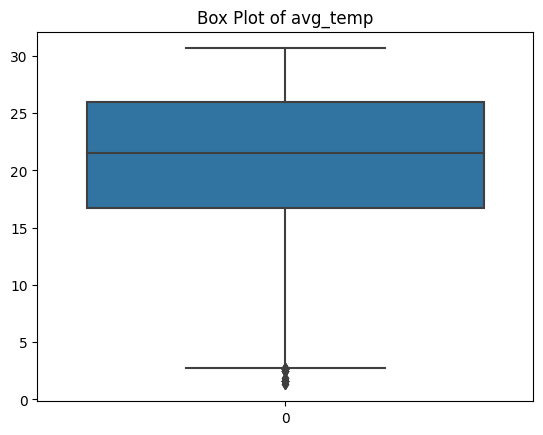

In [7]:
# Box Plots
sns.boxplot(data=cropData['hg/ha_yield'])
plt.title('Box Plot of hg/ha_yield')
plt.show()

sns.boxplot(data=cropData['average_rain_fall_mm_per_year'])
plt.title('Box Plot of average_rain_fall_mm_per_year')
plt.show()

sns.boxplot(data=cropData['pesticides_tonnes'])
plt.title('Box Plot of pesticides_tonnes')
plt.show()

sns.boxplot(data=cropData['avg_temp'])
plt.title('Box Plot of avg_temp')
plt.show()

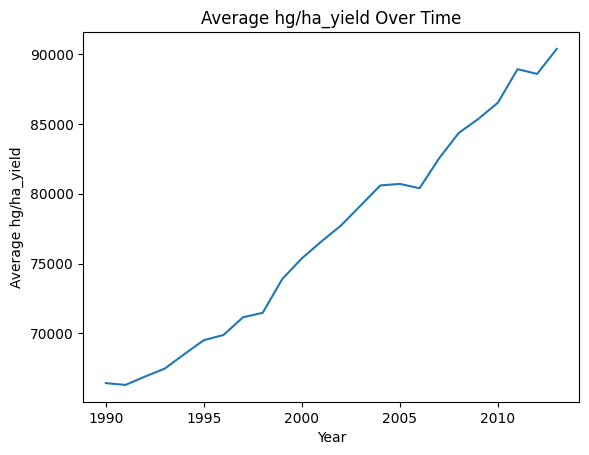

In [8]:
# Time Series Analysis
cropData.groupby('Year')['hg/ha_yield'].mean().plot()
plt.title('Average hg/ha_yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average hg/ha_yield')
plt.show()

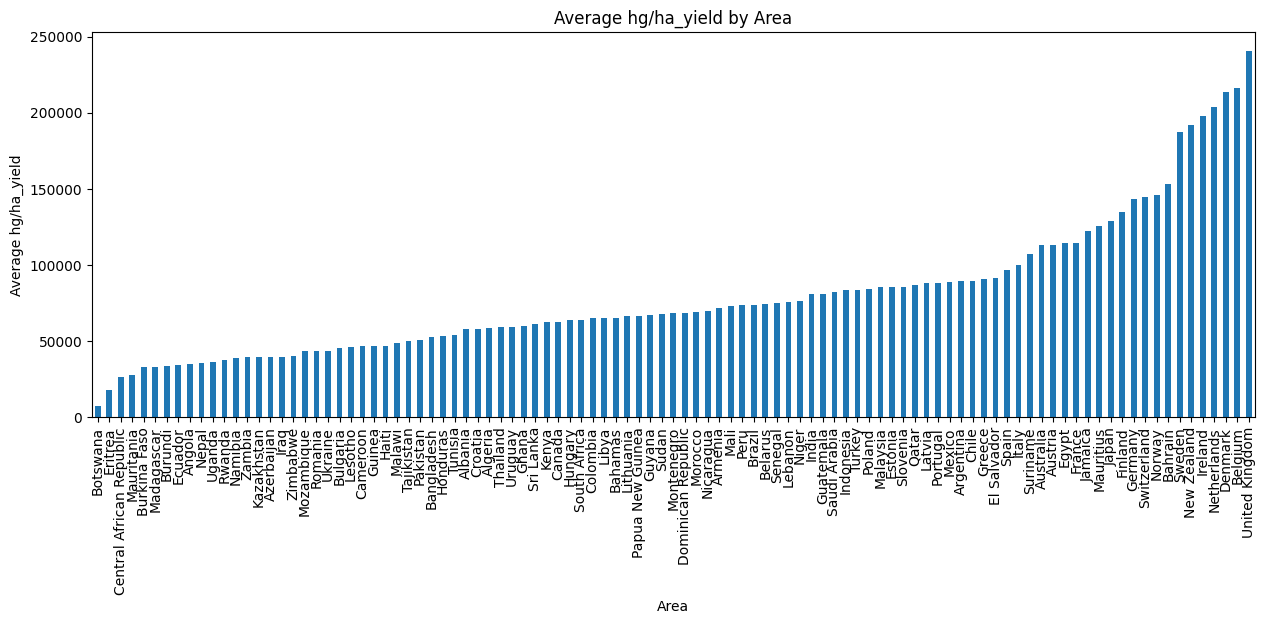

In [9]:
# Area
cropData.groupby('Area')['hg/ha_yield'].mean().sort_values().plot(kind='bar', figsize=(15, 5))
plt.title('Average hg/ha_yield by Area')
plt.xlabel('Area')
plt.ylabel('Average hg/ha_yield')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


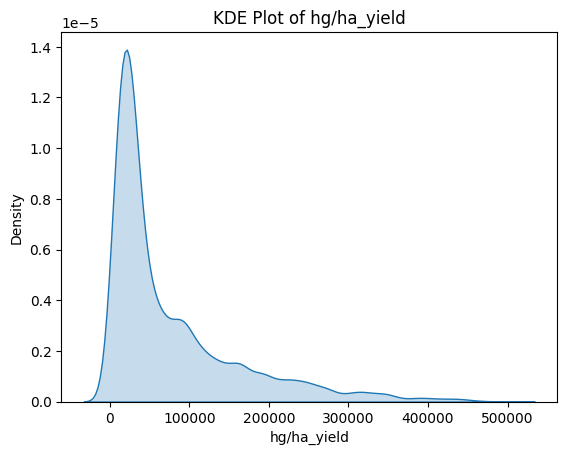

In [10]:
# Distribution Plots
cleaned_data = cropData['hg/ha_yield'].replace([np.inf, -np.inf], np.nan)
sns.kdeplot(cleaned_data, fill=True)
plt.title('KDE Plot of hg/ha_yield')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


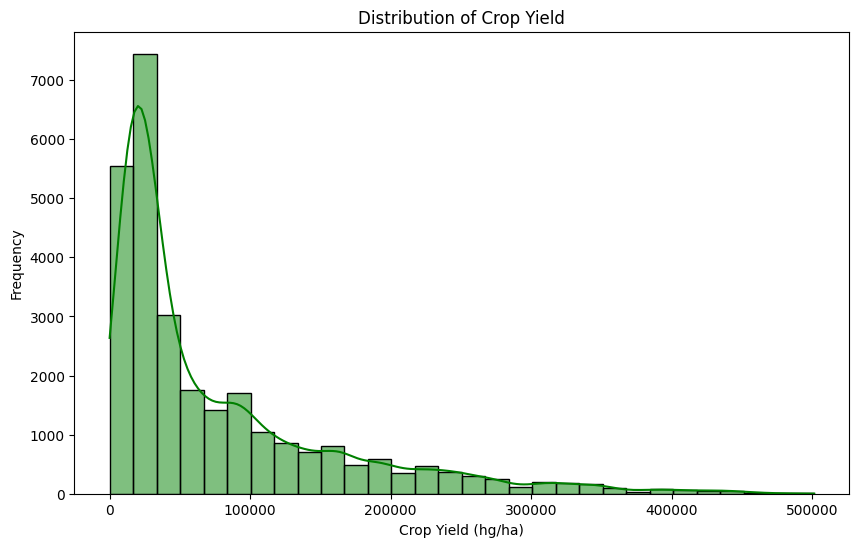

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(cropData['hg/ha_yield'], bins=30, kde=True, color='green')
plt.title('Distribution of Crop Yield')
plt.xlabel('Crop Yield (hg/ha)')
plt.ylabel('Frequency')
plt.show()

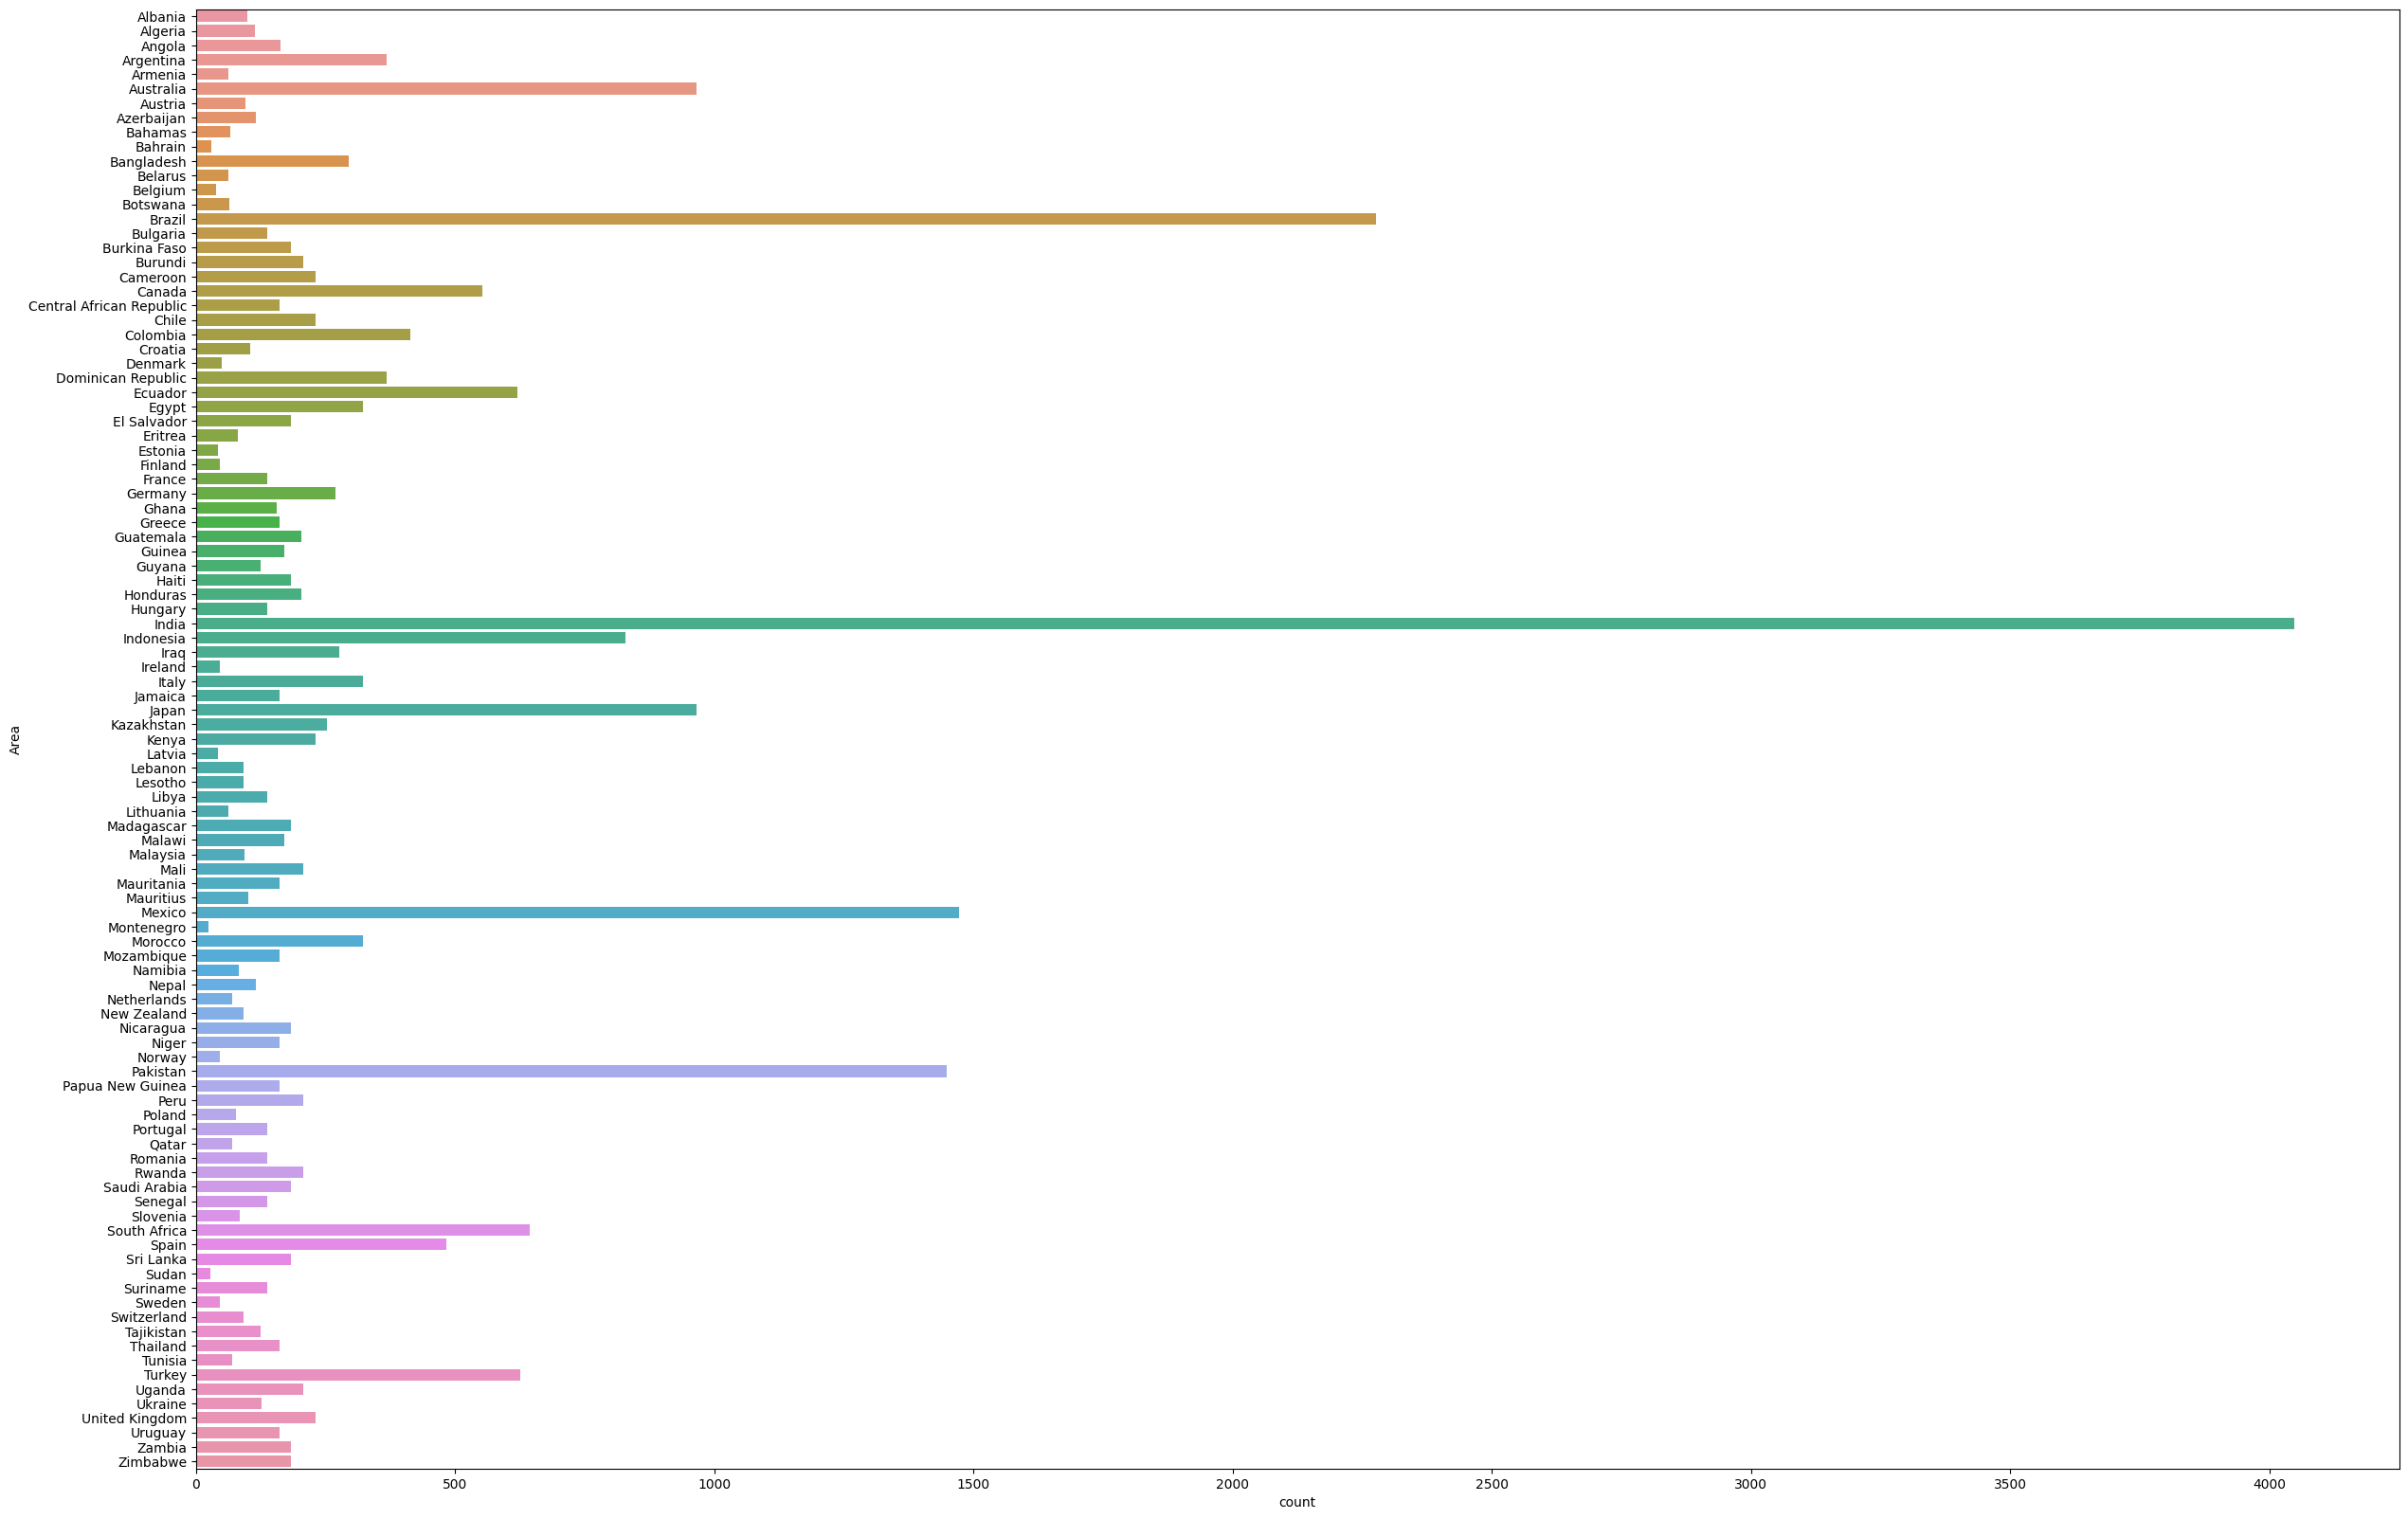

In [12]:
plt.figure(figsize = (30, 20))
sns.countplot(y="Area", data=cropData)
plt.show()

In [5]:
cropData.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
print (cropData.columns)

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')


> Drop entire row that has a null value as well as dropping the 'Unnamed' column as it is redundant and useless

In [10]:
cropData.dropna(axis=0)
cropData = cropData.drop(['Unnamed: 0'], axis=1) # Dropping Unnamed column to not create bias.
cropData.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


> Data Labeling to remove Catagorical data and replace it with numerical data for the models to understand

In [11]:
le = LabelEncoder()
for col in ['Area', 'Item']:
    cropData.loc[:, col] = le.fit_transform(cropData[col])

cropData.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37


> Splitting the data based on Year. upto 2011 and another dataset from 2012 to 2013

In [12]:
# A. Temporal Splitting (Year-Based)
data_sorted = cropData.sort_values(by='Year')

# Combine train and validation years
train_val_temp = data_sorted[data_sorted['Year'] <= 2011]  # Up to 2011 inclusive
test_temp = data_sorted[data_sorted['Year'] > 2011]
print(train_val_temp.head())
print("\n\n")
print(test_temp.head())

      Area Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0        0    1  1990        36613                         1485.0   
14575   43    6  1990        11149                         2702.0   
14576   43    6  1990        11149                         2702.0   
14577   43    6  1990        11149                         2702.0   
14578   43    6  1990        11149                         2702.0   

       pesticides_tonnes  avg_temp  
0                  121.0     16.37  
14575             2432.0     27.05  
14576             2432.0     27.11  
14577             2432.0     27.18  
14578             2432.0     26.79  



      Area Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
14218   42    0  2012       385818                         1083.0   
6900    22    0  2012        96365                         3240.0   
6904    22    2  2012        80883                         3240.0   
6905    22    3  2012       181661                         3240.0   
6906    22    3

> Preparing the data based on Year for the models

In [13]:
# Split train_val into train and validation
# data before 2012
train_temp_X = train_val_temp.drop(['hg/ha_yield'], axis=1)
train_temp_y = train_val_temp['hg/ha_yield']

# datas after 2011
test_temp_X = test_temp.drop(['hg/ha_yield'], axis=1)
test_temp_y = test_temp['hg/ha_yield']

#Split the train_temp data into train and validation
train_temp_X, val_temp_X, train_temp_y, val_temp_y = train_test_split(train_temp_X, train_temp_y, test_size=0.2, random_state=42, shuffle = False) # shuffle=False is very important for time series data

eval_temp_X = test_temp_X #The test data is the evaluation data for temporal splitting
eval_temp_y = test_temp_y

> Preparing the data based on Area for the models

In [14]:
# B. Spatial Splitting (Area-Based)
unique_areas = cropData['Area'].unique()

# Corrected spatial split
np.random.seed(42)
test_areas = np.random.choice(unique_areas, size=int(0.2 * len(unique_areas)), replace=False)
train_val_areas = np.setdiff1d(unique_areas, test_areas)

train_val_spatial = cropData[cropData['Area'].isin(train_val_areas)]
test_spatial = cropData[cropData['Area'].isin(test_areas)]

train_val_spatial_X = train_val_spatial.drop(['hg/ha_yield'], axis=1)
train_val_spatial_y = train_val_spatial['hg/ha_yield']

test_spatial_X = test_spatial.drop(['hg/ha_yield'], axis=1)
test_spatial_y = test_spatial['hg/ha_yield']

train_spatial_X, val_spatial_X, train_spatial_y, val_spatial_y = train_test_split(
    train_spatial_X, train_spatial_y, test_size=0.2, random_state=42
)

eval_spatial_X = test_spatial_X  # The test data is the evaluation data for spatial splitting
eval_spatial_y = test_spatial_y

> Scaling the Spatial data for better performance

In [15]:
# Scaling for Spatial Data
scaler_spatial_X = StandardScaler()
train_spatial_X_scaled = scaler_spatial_X.fit_transform(train_spatial_X)
val_spatial_X_scaled = scaler_spatial_X.transform(val_spatial_X)
test_spatial_X_scaled = scaler_spatial_X.transform(test_spatial_X)
eval_spatial_X_scaled = scaler_spatial_X.transform(eval_spatial_X)

# Convert back to DataFrames (Optional but useful for column names)
train_spatial_X_scaled = pd.DataFrame(train_spatial_X_scaled, columns=train_spatial_X.columns, index=train_spatial_X.index)
val_spatial_X_scaled = pd.DataFrame(val_spatial_X_scaled, columns=val_spatial_X.columns, index=val_spatial_X.index)
test_spatial_X_scaled = pd.DataFrame(test_spatial_X_scaled, columns=test_spatial_X.columns, index=test_spatial_X.index)
eval_spatial_X_scaled = pd.DataFrame(eval_spatial_X_scaled, columns=eval_spatial_X.columns, index=eval_spatial_X.index)


> Scaling the temporal data inorder to improve effectiveness

In [16]:
# Scaling for Spatial Data
scaler_spatial_X = StandardScaler()
train_spatial_X_scaled = scaler_spatial_X.fit_transform(train_spatial_X)
val_spatial_X_scaled = scaler_spatial_X.transform(val_spatial_X)  # Transform using the fitted scaler
test_spatial_X_scaled = scaler_spatial_X.transform(test_spatial_X) # Transform using the fitted scaler
eval_spatial_X_scaled = scaler_spatial_X.transform(eval_spatial_X) # Transform using the fitted scaler

# Convert back to DataFrames (optional but often useful)
train_spatial_X_scaled = pd.DataFrame(train_spatial_X_scaled, columns=train_spatial_X.columns, index = train_spatial_X.index)
val_spatial_X_scaled = pd.DataFrame(val_spatial_X_scaled, columns=val_spatial_X.columns, index = val_spatial_X.index)
test_spatial_X_scaled = pd.DataFrame(test_spatial_X_scaled, columns=test_spatial_X.columns, index = test_spatial_X.index)
eval_spatial_X_scaled = pd.DataFrame(eval_spatial_X_scaled, columns=eval_spatial_X.columns, index = eval_spatial_X.index)

> Hyper parameter tuining for Random Forest on Temporal data

In [17]:
# Hyperparameter Tuning and Model Selection (Temporal Only)
param_grid = {'n_estimators': [20, 30, 50, 75, 100], 'max_depth': [10, 20, 30]}
grid_search_temp = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=1)
grid_search_temp.fit(train_temp_X_scaled, train_temp_y)
best_rf_temp = grid_search_temp.best_estimator_


> applying crossvalidation and implementing on the best estimator

In [18]:
# Get cross-validation scores for the best model
cv_scores_temp = cross_val_score(best_rf_temp, train_temp_X_scaled, train_temp_y, cv=5, scoring='neg_mean_squared_error')

print("Cross-Validation Scores for Best Temporal Model:", cv_scores_temp)
print("Mean Cross-Validation Negative MSE for Best Temporal Model:", cv_scores_temp.mean())

# Evaluation on Test Set (Temporal Only)
predictions_temp = best_rf_temp.predict(test_temp_X_scaled)
mse_temp = mean_squared_error(test_temp_y, predictions_temp)
rmse_temp = np.sqrt(mse_temp)
mae_temp = mean_absolute_error(test_temp_y, predictions_temp)
r2_temp = r2_score(test_temp_y, predictions_temp)
print("\nTemporal Model Evaluation (Test Set):")
print(f"MSE: {mse_temp}, RMSE: {rmse_temp}, MAE: {mae_temp}, R-squared: {r2_temp}")

# Evaluation on Evaluation Set (Temporal Only)
predictions_eval_temp = best_rf_temp.predict(eval_temp_X_scaled)
mse_eval_temp = mean_squared_error(eval_temp_y, predictions_eval_temp)
rmse_eval_temp = np.sqrt(mse_eval_temp)
mae_eval_temp = mean_absolute_error(eval_temp_y, predictions_eval_temp)
r2_eval_temp = r2_score(eval_temp_y, predictions_eval_temp)
print("\nTemporal Model Evaluation (Evaluation Set):")
print(f"MSE: {mse_eval_temp}, RMSE: {rmse_eval_temp}, MAE: {mae_eval_temp}, R-squared: {r2_eval_temp}")

# Print the best parameters
print(f"Best parameters: {grid_search_temp.best_params_}")

#Print the train scores for the best model
print(f"Train scores: {grid_search_temp.cv_results_['mean_train_score'][grid_search_temp.best_index_]}")


Cross-Validation Scores for Best Temporal Model: [-2.36608557e+08 -1.41904617e+08 -1.91065914e+08 -2.96871181e+08
 -8.07451785e+08]
Mean Cross-Validation Negative MSE for Best Temporal Model: -334780410.7573893

Temporal Model Evaluation (Test Set):
MSE: 802411669.6330434, RMSE: 28326.871864592522, MAE: 14939.985414847164, R-squared: 0.9131699359897865

Temporal Model Evaluation (Evaluation Set):
MSE: 802411669.6330434, RMSE: 28326.871864592522, MAE: 14939.985414847164, R-squared: 0.9131699359897865
Best parameters: {'max_depth': 30, 'n_estimators': 50}
Train scores: -12466094.795777151


Random Forest Regressor
> Graphs
>> Temporal Data

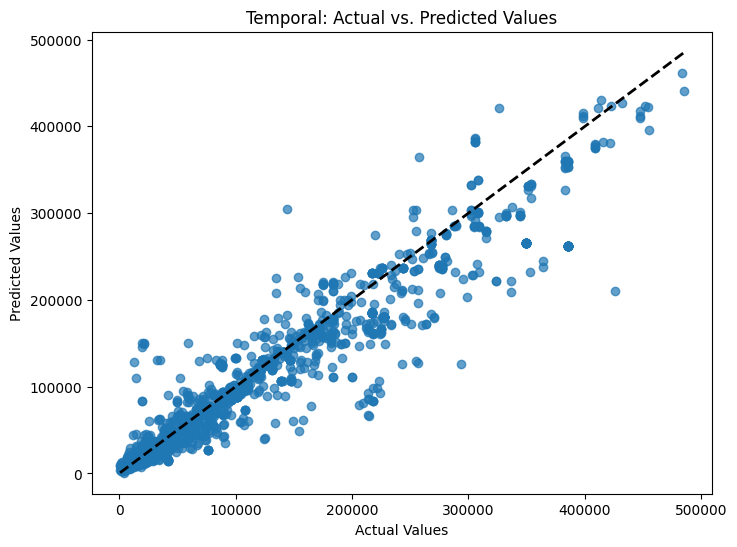

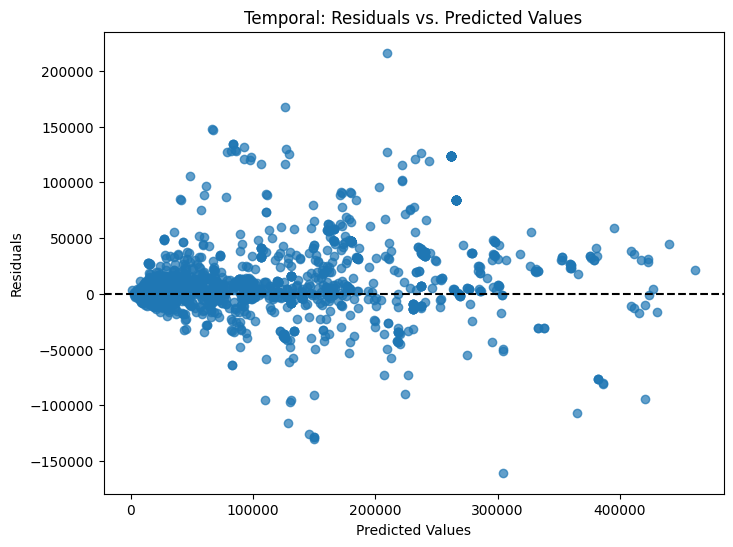

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


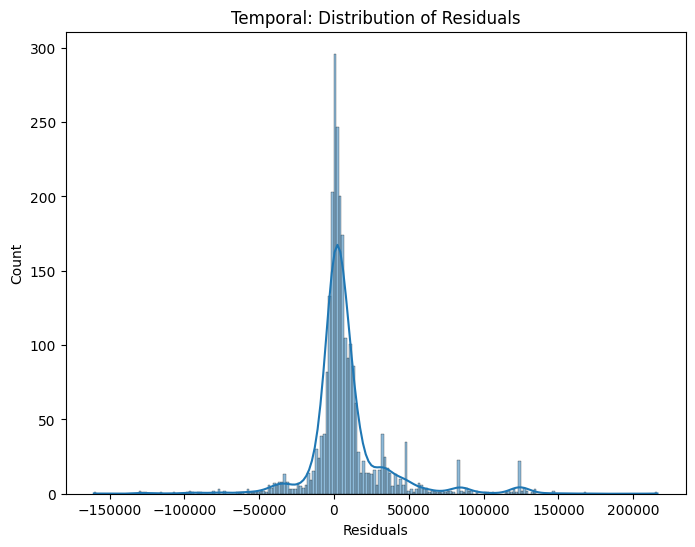

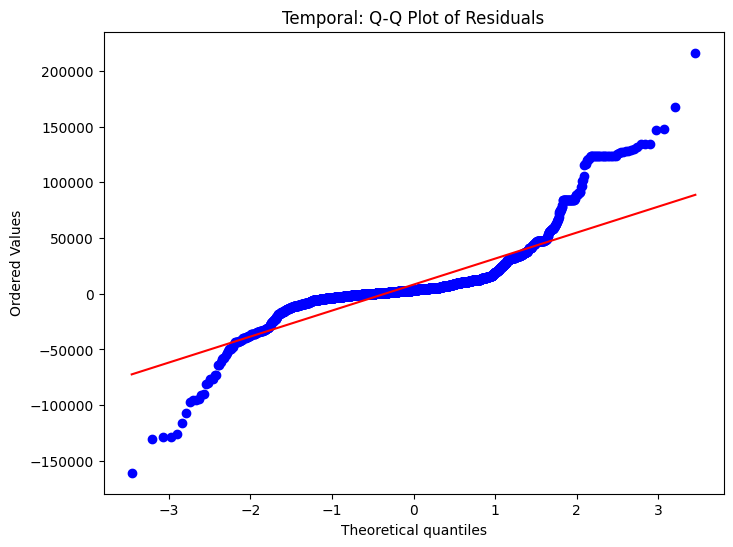

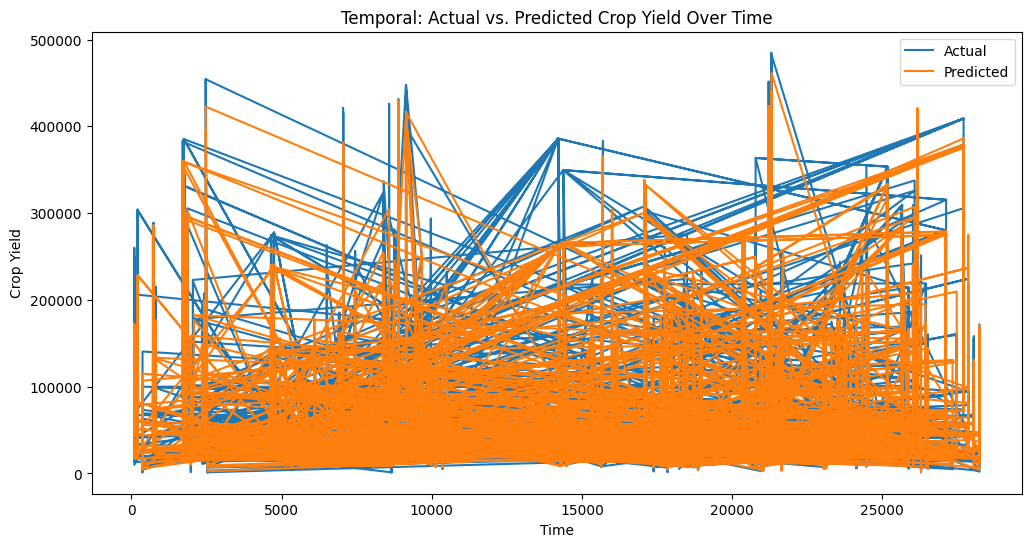

In [28]:
# Plots for TEMPORAL model
# Actual vs. Predicted Values (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(test_temp_y, predictions_temp, alpha=0.7)
plt.plot([test_temp_y.min(), test_temp_y.max()], [test_temp_y.min(), test_temp_y.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Temporal: Actual vs. Predicted Values") #Added Temporal to the title
plt.show()

# Residuals vs. Predicted Values (Residual Plot)
residuals_temp = test_temp_y - predictions_temp #Calculate residuals for temporal data
plt.figure(figsize=(8, 6))
plt.scatter(predictions_temp, residuals_temp, alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Temporal: Residuals vs. Predicted Values")#Added Temporal to the title
plt.show()

# Distribution of Residuals (Histogram or KDE)
plt.figure(figsize=(8, 6))
sns.histplot(residuals_temp, kde=True)
plt.xlabel("Residuals")
plt.title("Temporal: Distribution of Residuals")#Added Temporal to the title
plt.show()

# Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(8, 6))
stats.probplot(residuals_temp, dist="norm", plot=plt)
plt.title("Temporal: Q-Q Plot of Residuals")#Added Temporal to the title
plt.show()

# Prediction Error Plot 
predictions_df_temp = pd.DataFrame({'Actual': test_temp_y, 'Predicted': predictions_temp}, index = test_temp_y.index)
plt.figure(figsize=(12, 6))
plt.plot(predictions_df_temp['Actual'], label='Actual')
plt.plot(predictions_df_temp['Predicted'], label='Predicted')
plt.xlabel("Time")
plt.ylabel("Crop Yield")
plt.title("Temporal: Actual vs. Predicted Crop Yield Over Time")#Added Temporal to the title
plt.legend()
plt.show()

> Applying Hyper parameter tuning for Spatial data

In [20]:
# Hyperparameter Tuning and Model Selection (Spatial Only)
param_grid = {'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [None, 10, 20, 30]}
grid_search_spatial = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=1)
grid_search_spatial.fit(train_spatial_X_scaled, train_spatial_y)
best_rf_spatial = grid_search_spatial.best_estimator_

> choosing the best estimator after tuining

In [22]:
# Get cross-validation scores for the best spatial model
cv_scores_spatial = cross_val_score(best_rf_spatial, train_spatial_X_scaled, train_spatial_y, cv=5, scoring='neg_mean_squared_error', n_jobs = 1)

print("Cross-Validation Scores for Best Spatial Model:", cv_scores_spatial)
print("Mean Cross-Validation Negative MSE for Best Spatial Model:", cv_scores_spatial.mean())

# Evaluation on Test Set (Spatial Only)
predictions_spatial = best_rf_spatial.predict(test_spatial_X_scaled)
mse_spatial = mean_squared_error(test_spatial_y, predictions_spatial)
rmse_spatial = np.sqrt(mse_spatial)
mae_spatial = mean_absolute_error(test_spatial_y, predictions_spatial)
r2_spatial = r2_score(test_spatial_y, predictions_spatial)
print("\nSpatial Model Evaluation (Test Set):")
print(f"MSE: {mse_spatial}, RMSE: {rmse_spatial}, MAE: {mae_spatial}, R-squared: {r2_spatial}")

# Evaluation on Evaluation Set (Spatial Only)
predictions_eval_spatial = best_rf_spatial.predict(eval_spatial_X_scaled)
mse_eval_spatial = mean_squared_error(eval_spatial_y, predictions_eval_spatial)
rmse_eval_spatial = np.sqrt(mse_eval_spatial)
mae_eval_spatial = mean_absolute_error(eval_spatial_y, predictions_eval_spatial)
r2_eval_spatial = r2_score(eval_spatial_y, predictions_eval_spatial)
print("\nSpatial Model Evaluation (Evaluation Set):")
print(f"MSE: {mse_eval_spatial}, RMSE: {rmse_eval_spatial}, MAE: {mae_eval_spatial}, R-squared: {r2_eval_spatial}")

#Print the best parameters
print(f"Best parameters: {grid_search_spatial.best_params_}")

#Print the train scores for the best model
print(f"Train scores: {grid_search_spatial.cv_results_['mean_train_score'][grid_search_spatial.best_index_]}")

Cross-Validation Scores for Best Spatial Model: [-1.45960723e+08 -1.02584292e+08 -1.14262359e+08 -9.78671806e+07
 -1.01247481e+08]
Mean Cross-Validation Negative MSE for Best Spatial Model: -112384407.20174539

Spatial Model Evaluation (Test Set):
MSE: 2958963214.6730266, RMSE: 54396.35295378751, MAE: 30425.581770481956, R-squared: 0.7202480606997884

Spatial Model Evaluation (Evaluation Set):
MSE: 2958963214.6730266, RMSE: 54396.35295378751, MAE: 30425.581770481956, R-squared: 0.7202480606997884
Best parameters: {'max_depth': 20, 'n_estimators': 200}
Train scores: -16711477.122267777


Random Forest Regressor
> Graphs
>> Spatial Data

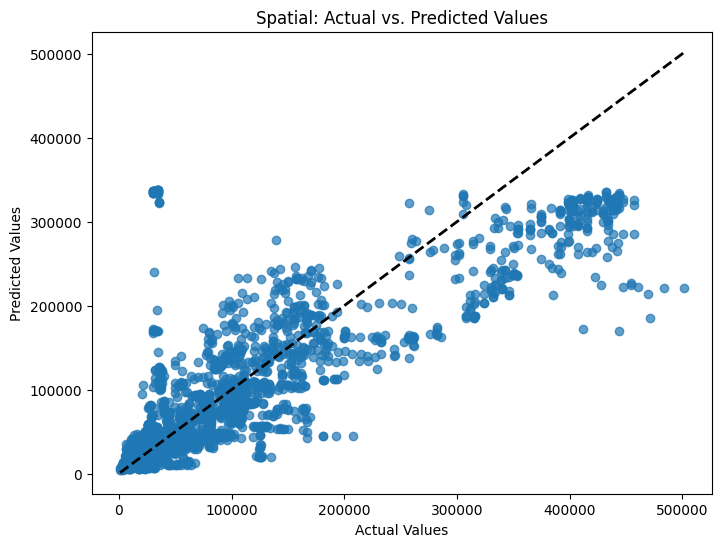

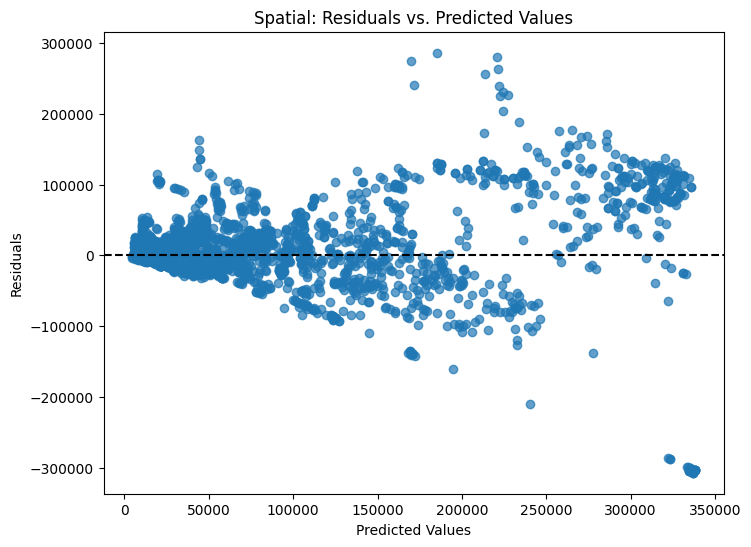

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


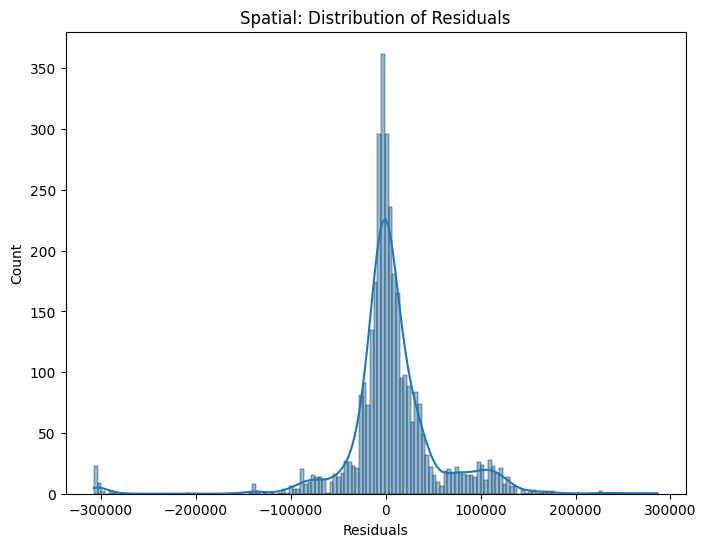

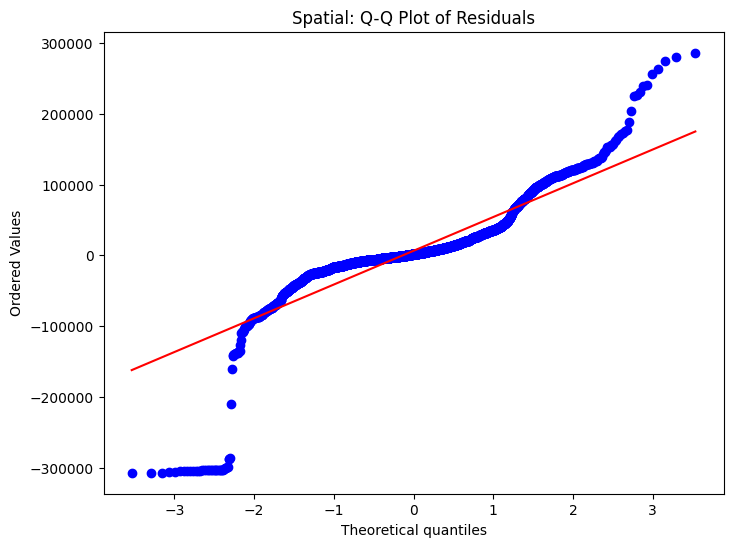

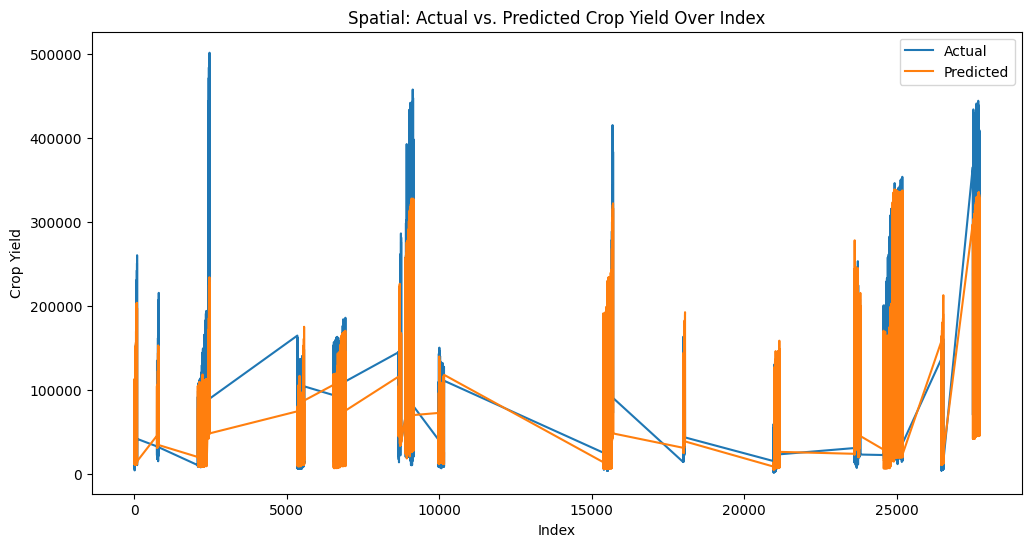

In [27]:
# Plots for SPATIAL model 
# Actual vs. Predicted Values (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(test_spatial_y, predictions_spatial, alpha=0.7)
plt.plot([test_spatial_y.min(), test_spatial_y.max()], [test_spatial_y.min(), test_spatial_y.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Spatial: Actual vs. Predicted Values") #Added Spatial to the title
plt.show()

# Residuals vs. Predicted Values (Residual Plot)
residuals_spatial = test_spatial_y - predictions_spatial #Calculate residuals for spatial data
plt.figure(figsize=(8, 6))
plt.scatter(predictions_spatial, residuals_spatial, alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Spatial: Residuals vs. Predicted Values") #Added Spatial to the title
plt.show()

# Distribution of Residuals (Histogram or KDE)
plt.figure(figsize=(8, 6))
sns.histplot(residuals_spatial, kde=True)
plt.xlabel("Residuals")
plt.title("Spatial: Distribution of Residuals") #Added Spatial to the title
plt.show()

# Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(8, 6))
stats.probplot(residuals_spatial, dist="norm", plot=plt)
plt.title("Spatial: Q-Q Plot of Residuals") #Added Spatial to the title
plt.show()

# Prediction Error Plot
predictions_df_spatial = pd.DataFrame({'Actual': test_spatial_y, 'Predicted': predictions_spatial}, index = test_spatial_y.index)
plt.figure(figsize=(12, 6))
plt.plot(predictions_df_spatial['Actual'], label='Actual')
plt.plot(predictions_df_spatial['Predicted'], label='Predicted')
plt.xlabel("Index")
plt.ylabel("Crop Yield")
plt.title("Spatial: Actual vs. Predicted Crop Yield Over Index")#Added Spatial to the title
plt.legend()
plt.show()

> Working with SVM

Hyperparameter Tuning SVM and Selecting the best Model
> Temporal Data

In [32]:
# param_grid_svr = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']} #Example parameter grid

param_grid_svr = {'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']} #Example parameter grid
grid_search_svr_temp = GridSearchCV(SVR(), param_grid_svr, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error', return_train_score=True, n_jobs=1) #Use TimeSeriesSplit
grid_search_svr_temp.fit(train_temp_X_scaled, train_temp_y)
best_svr_temp = grid_search_svr_temp.best_estimator_

> Getting cross-validation score for the best SVR model

In [34]:
cv_scores_svr_temp = cross_val_score(best_svr_temp, train_temp_X_scaled, train_temp_y, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error', n_jobs=1) #Use TimeSeriesSplit
print("Cross-Validation Scores for Best Temporal SVR Model:", cv_scores_svr_temp)
print("Mean Cross-Validation Negative MSE for Best Temporal SVR Model:", cv_scores_svr_temp.mean())

Cross-Validation Scores for Best Temporal SVR Model: [-6.71323308e+09 -7.45863120e+09 -8.21193712e+09 -9.64932613e+09
 -9.84573791e+09]
Mean Cross-Validation Negative MSE for Best Temporal SVR Model: -8375773088.861465


> Evaluating the final model

In [35]:
predictions_svr_temp = best_svr_temp.predict(test_temp_X_scaled)
mse_svr_temp = mean_squared_error(test_temp_y, predictions_svr_temp)
rmse_svr_temp = np.sqrt(mse_svr_temp)
mae_svr_temp = mean_absolute_error(test_temp_y, predictions_svr_temp)
r2_svr_temp = r2_score(test_temp_y, predictions_svr_temp)
print("\nTemporal SVR Model Evaluation (Test Set):")
print(f"MSE: {mse_svr_temp}, RMSE: {rmse_svr_temp}, MAE: {mae_svr_temp}, R-squared: {r2_svr_temp}")

predictions_eval_svr_temp = best_svr_temp.predict(eval_temp_X_scaled)
mse_eval_svr_temp = mean_squared_error(eval_temp_y, predictions_eval_svr_temp)
rmse_eval_svr_temp = np.sqrt(mse_eval_svr_temp)
mae_eval_svr_temp = mean_absolute_error(eval_temp_y, predictions_eval_svr_temp)
r2_eval_svr_temp = r2_score(eval_temp_y, predictions_eval_svr_temp)
print("\nTemporal SVR Model Evaluation (Evaluation Set):")
print(f"MSE: {mse_eval_temp}, RMSE: {rmse_eval_temp}, MAE: {mae_eval_temp}, R-squared: {r2_eval_temp}")

print(f"Best parameters: {grid_search_svr_temp.best_params_}")

#Print the train scores for the best model
print(f"Train scores: {grid_search_svr_temp.cv_results_['mean_train_score'][grid_search_svr_temp.best_index_]}")


Temporal SVR Model Evaluation (Test Set):
MSE: 12116823491.015352, RMSE: 110076.44385160411, MAE: 66453.01215600903, R-squared: -0.3111780388319465

Temporal SVR Model Evaluation (Evaluation Set):
MSE: 802411669.6330434, RMSE: 28326.871864592522, MAE: 14939.985414847164, R-squared: 0.9131699359897865
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Train scores: -6894298497.027722


Support Vector Machine
>Graphs
>> Temporal Data

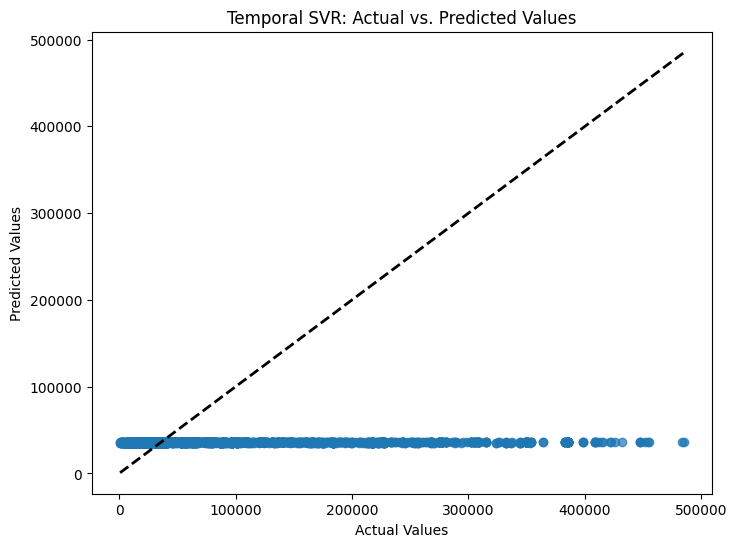

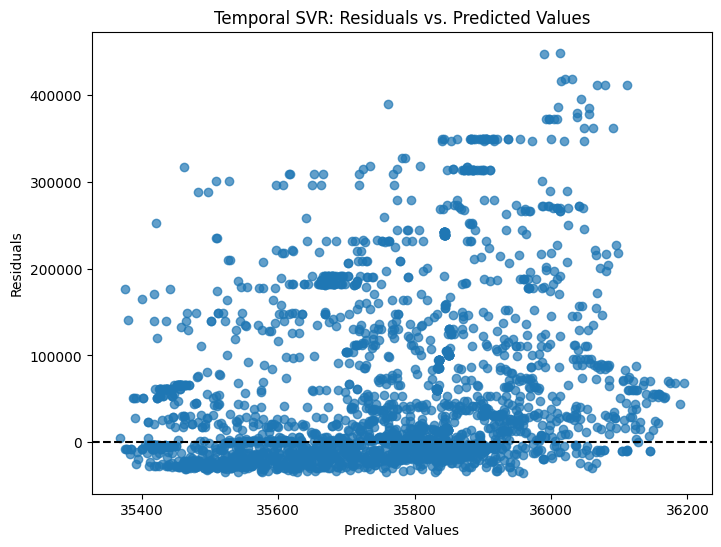

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


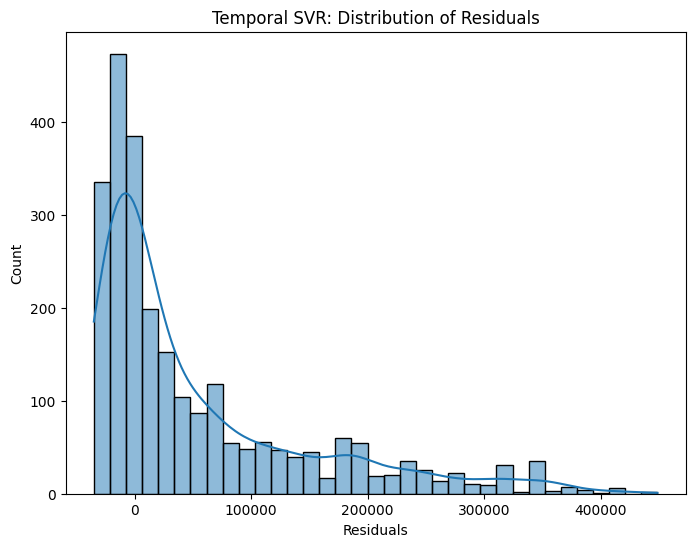

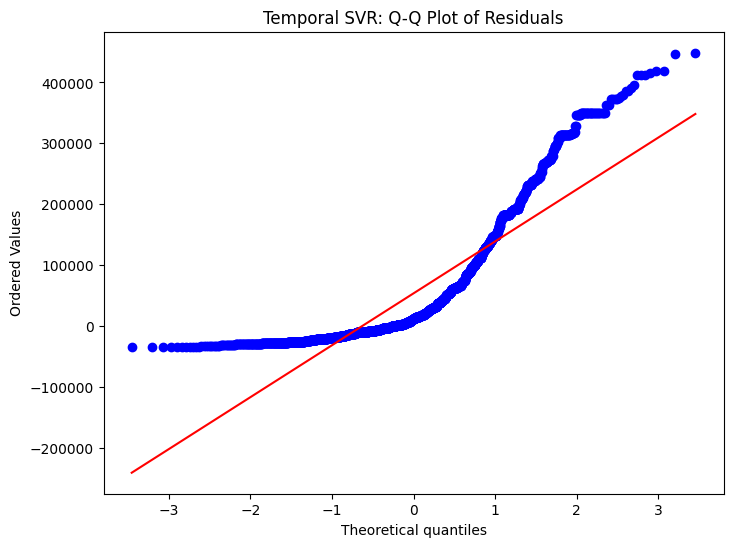

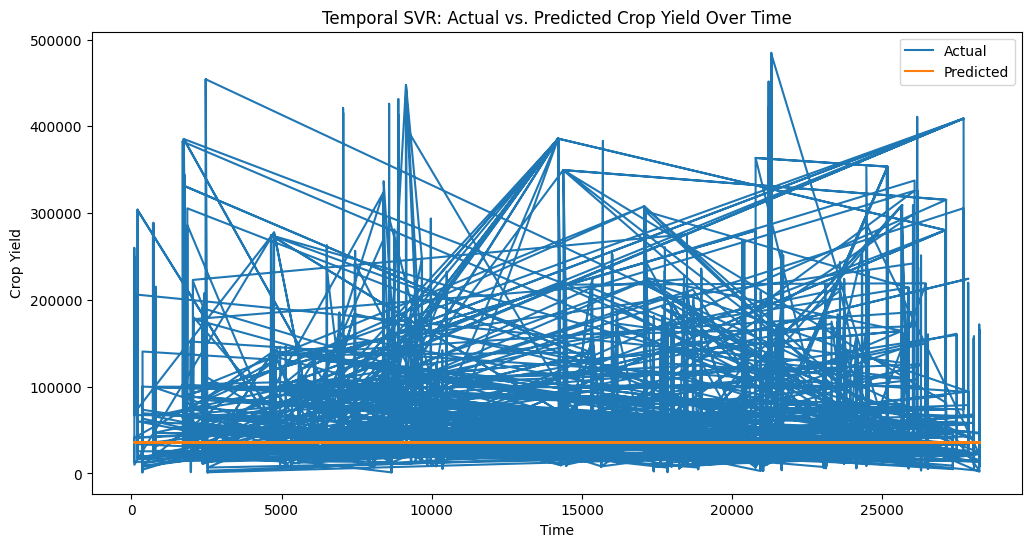

In [36]:
# Actual vs. Predicted Values (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(test_temp_y, predictions_svr_temp, alpha=0.7)
plt.plot([test_temp_y.min(), test_temp_y.max()], [test_temp_y.min(), test_temp_y.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Temporal SVR: Actual vs. Predicted Values")
plt.show()

# Residuals vs. Predicted Values (Residual Plot)
residuals_svr_temp = test_temp_y - predictions_svr_temp
plt.figure(figsize=(8, 6))
plt.scatter(predictions_svr_temp, residuals_svr_temp, alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Temporal SVR: Residuals vs. Predicted Values")
plt.show()

# Distribution of Residuals (Histogram or KDE)
plt.figure(figsize=(8, 6))
sns.histplot(residuals_svr_temp, kde=True)
plt.xlabel("Residuals")
plt.title("Temporal SVR: Distribution of Residuals")
plt.show()

# Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(8, 6))
stats.probplot(residuals_svr_temp, dist="norm", plot=plt)
plt.title("Temporal SVR: Q-Q Plot of Residuals")
plt.show()

# Prediction Error Plot (Optional, but useful for time series)
predictions_df_svr_temp = pd.DataFrame({'Actual': test_temp_y, 'Predicted': predictions_svr_temp}, index = test_temp_y.index)
plt.figure(figsize=(12, 6))
plt.plot(predictions_df_svr_temp['Actual'], label='Actual')
plt.plot(predictions_df_svr_temp['Predicted'], label='Predicted')
plt.xlabel("Time")
plt.ylabel("Crop Yield")
plt.title("Temporal SVR: Actual vs. Predicted Crop Yield Over Time")
plt.legend()
plt.show()

Hyperparameter Tuning SVM and Selecting the best Model
> Spatial Data

In [38]:
# param_grid_svr_spatial = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

param_grid_svr_spatial = {'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']}
grid_search_svr_spatial = GridSearchCV(SVR(), param_grid_svr_spatial, cv=KFold(n_splits=5), scoring='neg_mean_squared_error', return_train_score=True, n_jobs=1)
grid_search_svr_spatial.fit(train_spatial_X_scaled, train_spatial_y)
best_svr_spatial = grid_search_svr_spatial.best_estimator_

>Getting the cross validation scores for the best SVR model

In [39]:
cv_scores_svr_spatial = cross_val_score(best_svr_spatial, train_spatial_X_scaled, train_spatial_y, cv=KFold(n_splits=5), scoring='neg_mean_squared_error', n_jobs=1)
print("Cross-Validation Scores for Best Spatial SVR Model:", cv_scores_svr_spatial)
print("Mean Cross-Validation Negative MSE for Best Spatial SVR Model:", cv_scores_svr_spatial.mean())

Cross-Validation Scores for Best Spatial SVR Model: [-8.11970069e+09 -8.36064719e+09 -8.75248014e+09 -7.77056548e+09
 -8.07376843e+09]
Mean Cross-Validation Negative MSE for Best Spatial SVR Model: -8215432384.043669


Evaluation on Test Set
> Spatial Data

In [40]:
predictions_svr_spatial = best_svr_spatial.predict(test_spatial_X_scaled)
mse_svr_spatial = mean_squared_error(test_spatial_y, predictions_svr_spatial)
rmse_svr_spatial = np.sqrt(mse_svr_spatial)
mae_svr_spatial = mean_absolute_error(test_spatial_y, predictions_svr_spatial)
r2_svr_spatial = r2_score(test_spatial_y, predictions_svr_spatial)
print("\nSpatial SVR Model Evaluation (Test Set):")
print(f"MSE: {mse_svr_spatial}, RMSE: {rmse_svr_spatial}, MAE: {mae_svr_spatial}, R-squared: {r2_svr_spatial}")

predictions_eval_svr_spatial = best_svr_spatial.predict(eval_spatial_X_scaled)
mse_eval_svr_spatial = mean_squared_error(eval_spatial_y, predictions_eval_svr_spatial)
rmse_eval_svr_spatial = np.sqrt(mse_eval_svr_spatial)
mae_eval_svr_spatial = mean_absolute_error(eval_spatial_y, predictions_eval_svr_spatial)
r2_eval_svr_spatial = r2_score(eval_spatial_y, predictions_eval_svr_spatial)
print("\nSpatial SVR Model Evaluation (Evaluation Set):")
print(f"MSE: {mse_eval_spatial}, RMSE: {rmse_eval_spatial}, MAE: {mae_eval_spatial}, R-squared: {r2_eval_spatial}")

print(f"Best parameters: {grid_search_svr_spatial.best_params_}")

#Print the train scores for the best model
print(f"Train scores: {grid_search_svr_spatial.cv_results_['mean_train_score'][grid_search_svr_spatial.best_index_]}")


Spatial SVR Model Evaluation (Test Set):
MSE: 12472074674.69503, RMSE: 111678.44319605744, MAE: 62199.85394428493, R-squared: -0.1791586526122273

Spatial SVR Model Evaluation (Evaluation Set):
MSE: 2958963214.6730266, RMSE: 54396.35295378751, MAE: 30425.581770481956, R-squared: 0.7202480606997884
Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Train scores: -8215216726.862516


Support Vector Machine
>Graphs
>> Spatial Data

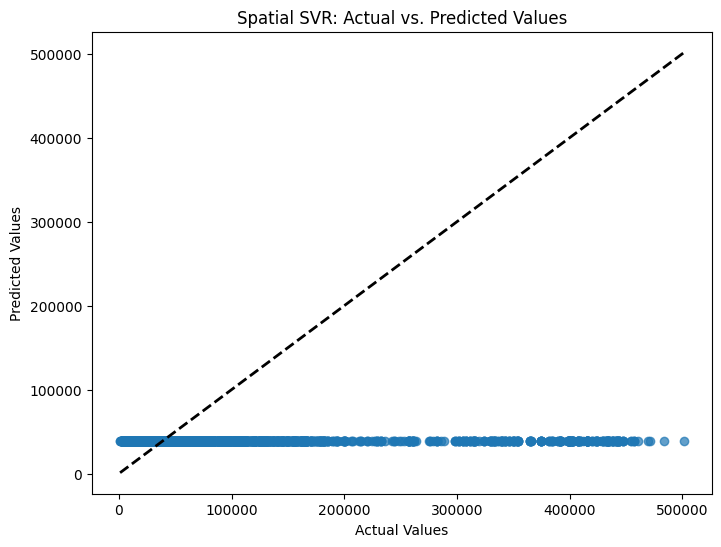

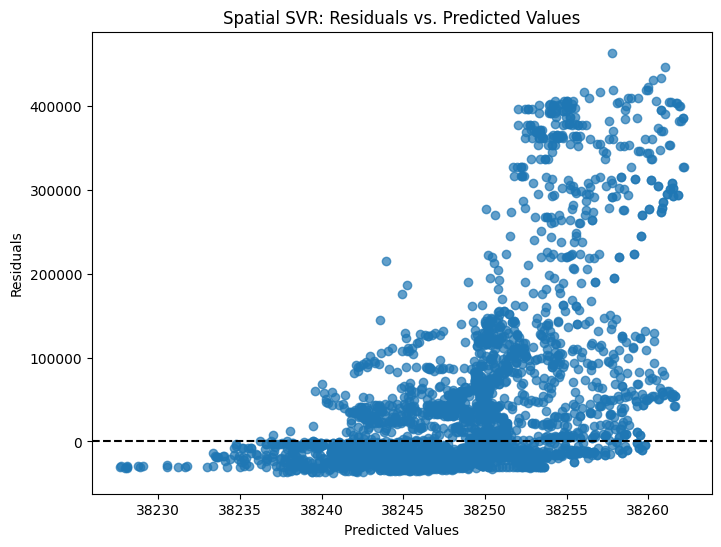

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


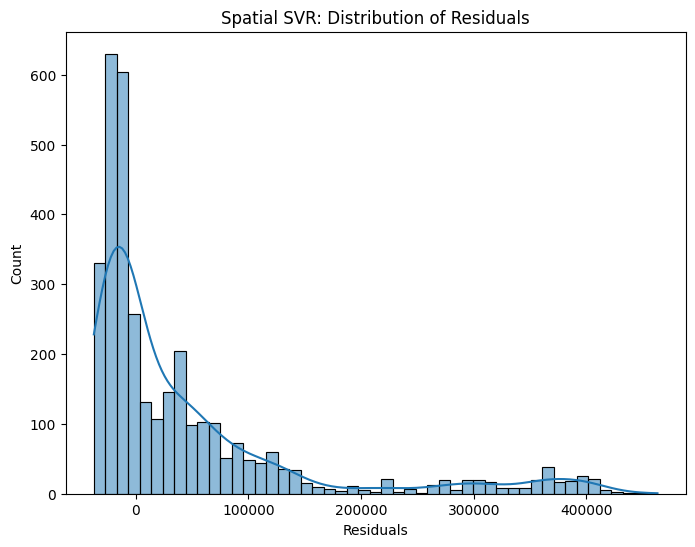

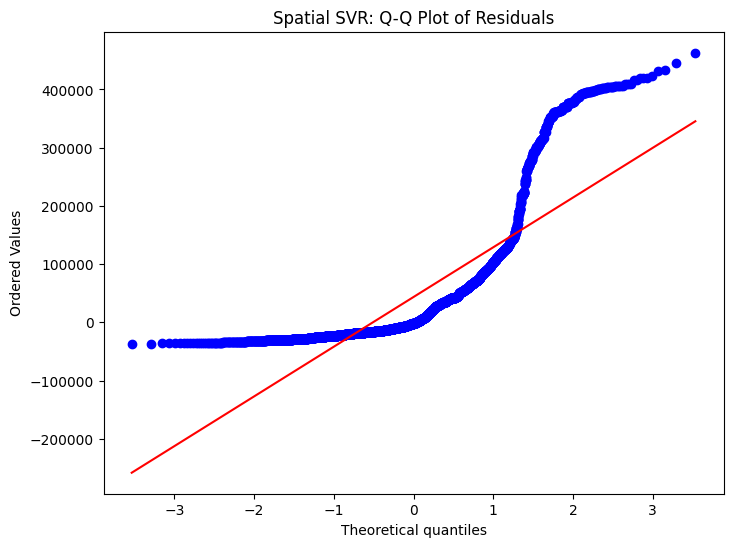

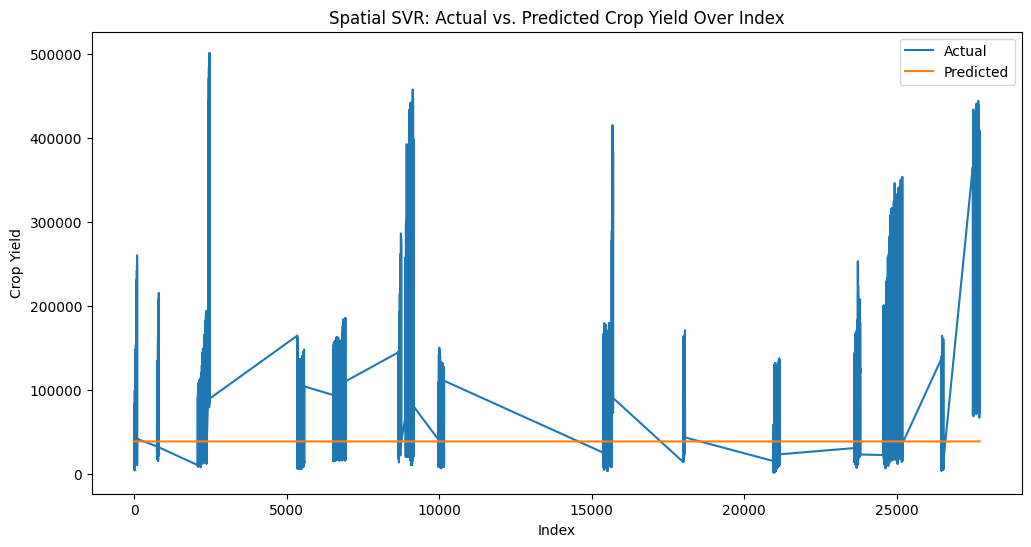

In [41]:
# Actual vs. Predicted Values (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(test_spatial_y, predictions_svr_spatial, alpha=0.7)
plt.plot([test_spatial_y.min(), test_spatial_y.max()], [test_spatial_y.min(), test_spatial_y.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Spatial SVR: Actual vs. Predicted Values")
plt.show()

# Residuals vs. Predicted Values (Residual Plot)
residuals_svr_spatial = test_spatial_y - predictions_svr_spatial
plt.figure(figsize=(8, 6))
plt.scatter(predictions_svr_spatial, residuals_svr_spatial, alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Spatial SVR: Residuals vs. Predicted Values")
plt.show()

# Distribution of Residuals (Histogram or KDE)
plt.figure(figsize=(8, 6))
sns.histplot(residuals_svr_spatial, kde=True)
plt.xlabel("Residuals")
plt.title("Spatial SVR: Distribution of Residuals")
plt.show()

# Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(8, 6))
stats.probplot(residuals_svr_spatial, dist="norm", plot=plt)
plt.title("Spatial SVR: Q-Q Plot of Residuals")
plt.show()

# Prediction Error Plot (Optional, but useful for time series)
predictions_df_svr_spatial = pd.DataFrame({'Actual': test_spatial_y, 'Predicted': predictions_svr_spatial}, index = test_spatial_y.index)
plt.figure(figsize=(12, 6))
plt.plot(predictions_df_svr_spatial['Actual'], label='Actual')
plt.plot(predictions_df_svr_spatial['Predicted'], label='Predicted')
plt.xlabel("Index") #Changed from Time to Index
plt.ylabel("Crop Yield")
plt.title("Spatial SVR: Actual vs. Predicted Crop Yield Over Index")#Changed from Time to index
plt.legend()
plt.show()

>Working with LSTM
>> Reshaping the data since LSTM is a deep learning model

In [42]:
# Reshape data for LSTM (samples, timesteps, features)
n_timesteps = 1  # Number of time steps to look back (adjust as needed)
n_features = train_temp_X_scaled.shape[1]

def reshape_data(X, y, n_timesteps):
    X_reshaped = []
    y_reshaped = []
    for i in range(len(X) - n_timesteps + 1):
        X_reshaped.append(X.iloc[i:i + n_timesteps].values)
        y_reshaped.append(y.iloc[i + n_timesteps -1])
    return np.array(X_reshaped), np.array(y_reshaped)

train_temp_X_reshaped, train_temp_y_reshaped = reshape_data(train_temp_X_scaled, train_temp_y, n_timesteps)
val_temp_X_reshaped, val_temp_y_reshaped = reshape_data(val_temp_X_scaled, val_temp_y, n_timesteps)
test_temp_X_reshaped, test_temp_y_reshaped = reshape_data(test_temp_X_scaled, test_temp_y, n_timesteps)
eval_temp_X_reshaped, eval_temp_y_reshaped = reshape_data(eval_temp_X_scaled, eval_temp_y, n_timesteps)

print(train_temp_X_reshaped.shape)
print(train_temp_y_reshaped.shape)

(20578, 1, 6)
(20578,)


> Building and Training the Model
>> Temporal Data

In [51]:
# Define the input shape
input_shape = (n_timesteps, n_features)

# Create the input layer
inputs = Input(shape=input_shape)

# Build the LSTM model
model_lstm_temp = keras.Sequential()
model_lstm_temp.add(layers.LSTM(64, activation='relu', input_shape=input_shape))  # Use input_shape here
model_lstm_temp.add(layers.Dense(1))

# Compile the model
model_lstm_temp.compile(optimizer='adam', loss='mse')

# Train the LSTM model
history_lstm_temp = model_lstm_temp.fit(train_temp_X_reshaped, train_temp_y_reshaped, epochs=50, batch_size=32, validation_data=(val_temp_X_reshaped, val_temp_y_reshaped), verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 11789125632.0000 - val_loss: 16349933568.0000
Epoch 2/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11690785792.0000 - val_loss: 16302898176.0000
Epoch 3/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11939444736.0000 - val_loss: 16234238976.0000
Epoch 4/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11607358464.0000 - val_loss: 16145997824.0000
Epoch 5/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11869997056.0000 - val_loss: 16042522624.0000
Epoch 6/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11498144768.0000 - val_loss: 15925533696.0000
Epoch 7/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11511115776.0000 - val_loss: 15796599808.0000
Epoch 8/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11511715840.0000 - val_loss: 15656920064.0000
Epoch 9/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11307515904.0000 - val_loss: 15505286144.0000
Epoch 10/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

>Evaluate the model
>> Temporal Data

In [52]:
predictions_lstm_temp = model_lstm_temp.predict(test_temp_X_reshaped)
predictions_lstm_temp = predictions_lstm_temp.flatten()

mse_lstm_temp = mean_squared_error(test_temp_y_reshaped, predictions_lstm_temp)
rmse_lstm_temp = np.sqrt(mse_lstm_temp)
mae_lstm_temp = mean_absolute_error(test_temp_y_reshaped, predictions_lstm_temp)
r2_lstm_temp = r2_score(test_temp_y_reshaped, predictions_lstm_temp)

print("\nTemporal LSTM Model Evaluation (Test Set):")
print(f"MSE: {mse_lstm_temp}, RMSE: {rmse_lstm_temp}, MAE: {mae_lstm_temp}, R-squared: {r2_lstm_temp}")

predictions_eval_lstm_temp = model_lstm_temp.predict(eval_temp_X_reshaped)
predictions_eval_lstm_temp = predictions_eval_lstm_temp.flatten() #Flatten the predictions

mse_eval_lstm_temp = mean_squared_error(eval_temp_y_reshaped, predictions_eval_lstm_temp)
rmse_eval_lstm_temp = np.sqrt(mse_eval_lstm_temp)
mae_eval_lstm_temp = mean_absolute_error(eval_temp_y_reshaped, predictions_eval_lstm_temp)
r2_eval_lstm_temp = r2_score(eval_temp_y_reshaped, predictions_eval_lstm_temp)

print("\nTemporal LSTM Model Evaluation (Evaluation Set):")
print(f"MSE: {mse_eval_lstm_temp}, RMSE: {rmse_eval_lstm_temp}, MAE: {mae_eval_lstm_temp}, R-squared: {r2_eval_lstm_temp}")


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Temporal LSTM Model Evaluation (Test Set):
MSE: 9018946154.966524, RMSE: 94968.13231272122, MAE: 67505.31118499405, R-squared: 0.02404750382239018
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Temporal LSTM Model Evaluation (Evaluation Set):
MSE: 9018946154.966524, RMSE: 94968.13231272122, MAE: 67505.31118499405, R-squared: 0.02404750382239018


Long Short Term Machine
>Graphs
>> Temporal Data

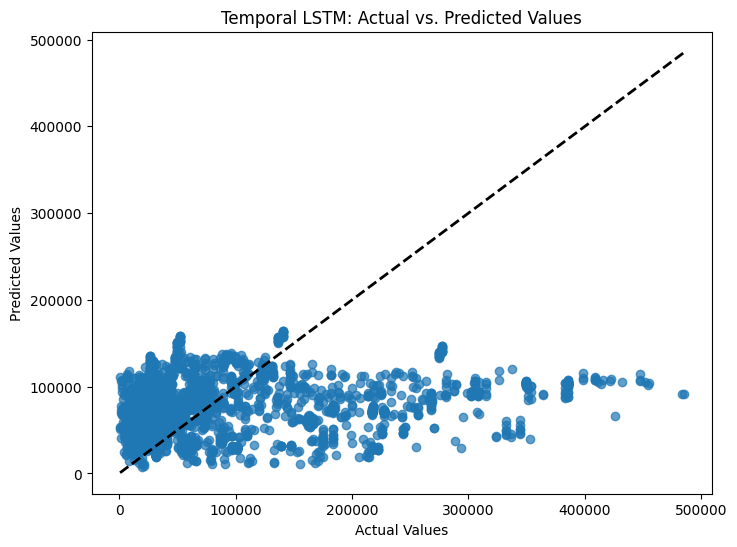

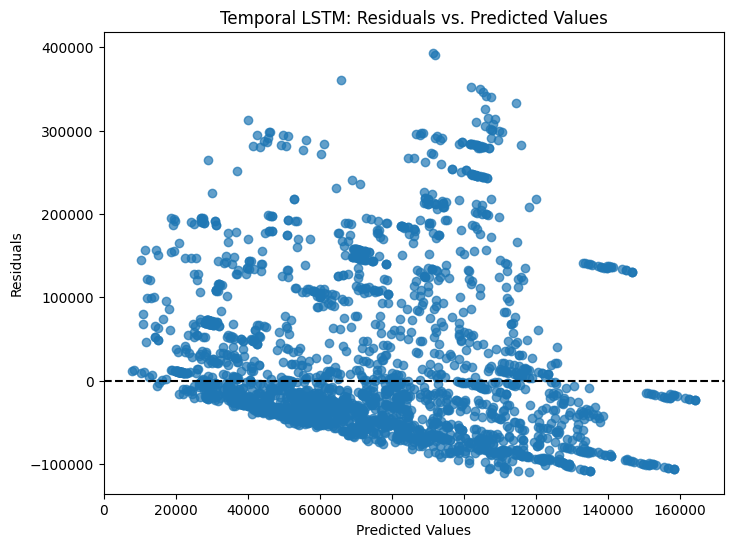

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


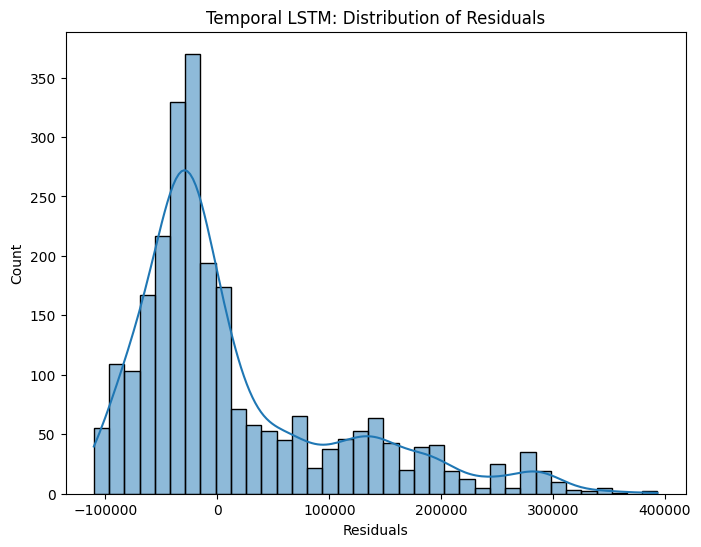

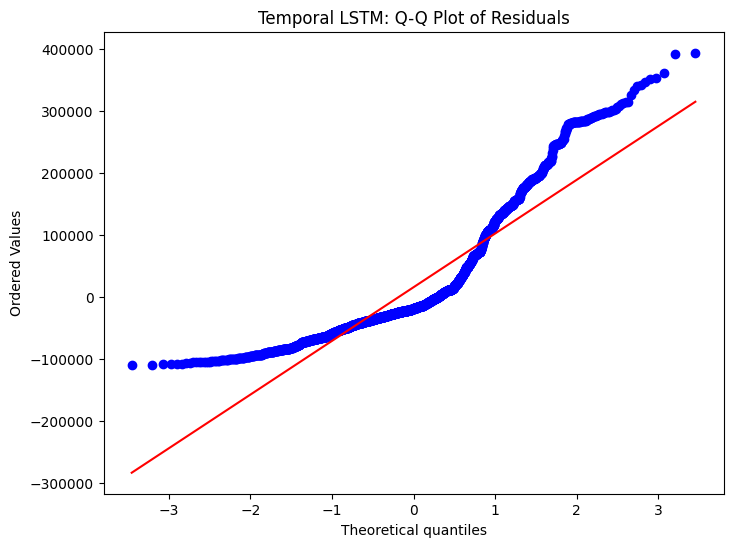

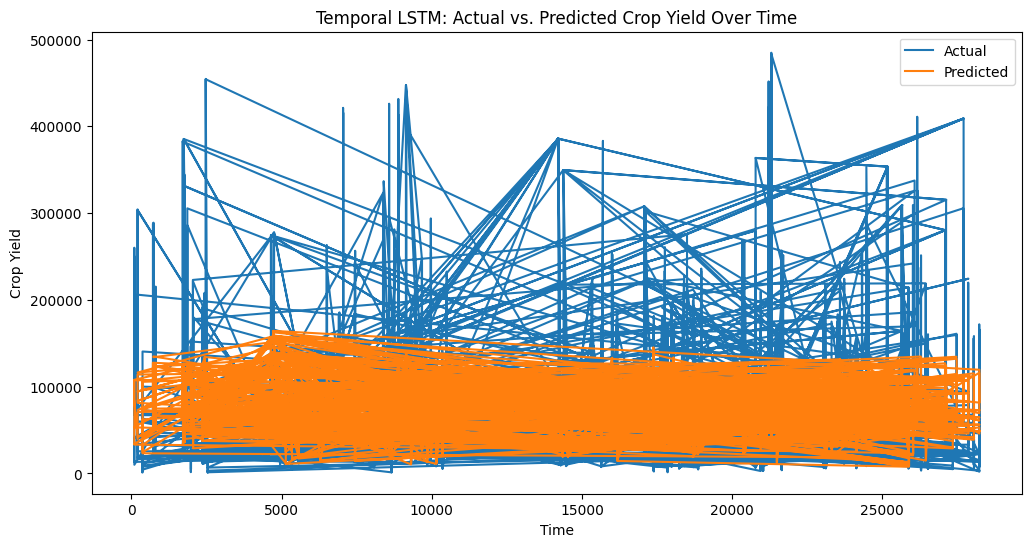

In [53]:
# Actual vs. Predicted Values (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(test_temp_y_reshaped, predictions_lstm_temp, alpha=0.7)
plt.plot([test_temp_y_reshaped.min(), test_temp_y_reshaped.max()], [test_temp_y_reshaped.min(), test_temp_y_reshaped.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Temporal LSTM: Actual vs. Predicted Values")
plt.show()

# Residuals vs. Predicted Values (Residual Plot)
residuals_lstm_temp = test_temp_y_reshaped - predictions_lstm_temp
plt.figure(figsize=(8, 6))
plt.scatter(predictions_lstm_temp, residuals_lstm_temp, alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Temporal LSTM: Residuals vs. Predicted Values")
plt.show()

# Distribution of Residuals (Histogram or KDE)
plt.figure(figsize=(8, 6))
sns.histplot(residuals_lstm_temp, kde=True)
plt.xlabel("Residuals")
plt.title("Temporal LSTM: Distribution of Residuals")
plt.show()

# Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(8, 6))
stats.probplot(residuals_lstm_temp, dist="norm", plot=plt)
plt.title("Temporal LSTM: Q-Q Plot of Residuals")
plt.show()

# Prediction Error Plot (Optional, but useful for time series)
predictions_df_lstm_temp = pd.DataFrame({'Actual': test_temp_y_reshaped, 'Predicted': predictions_lstm_temp}, index = test_temp_y.index[:len(test_temp_y_reshaped)])
plt.figure(figsize=(12, 6))
plt.plot(predictions_df_lstm_temp['Actual'], label='Actual')
plt.plot(predictions_df_lstm_temp['Predicted'], label='Predicted')
plt.xlabel("Time")
plt.ylabel("Crop Yield")
plt.title("Temporal LSTM: Actual vs. Predicted Crop Yield Over Time")
plt.legend()
plt.show()

Reshape the Data
> Spatial Data

In [54]:
n_timesteps = 1  # Treating each area as a single timestep
n_features = train_spatial_X_scaled.shape[1]

def reshape_data(X, y, n_timesteps):
    X_reshaped = []
    y_reshaped = []
    for i in range(len(X) - n_timesteps + 1):
        X_reshaped.append(X.iloc[i:i + n_timesteps].values)
        y_reshaped.append(y.iloc[i + n_timesteps -1])
    return np.array(X_reshaped), np.array(y_reshaped)

train_spatial_X_reshaped, train_spatial_y_reshaped = reshape_data(train_spatial_X_scaled, train_spatial_y, n_timesteps)
val_spatial_X_reshaped, val_spatial_y_reshaped = reshape_data(val_spatial_X_scaled, val_spatial_y, n_timesteps)
test_spatial_X_reshaped, test_spatial_y_reshaped = reshape_data(test_spatial_X_scaled, test_spatial_y, n_timesteps)
eval_spatial_X_reshaped, eval_spatial_y_reshaped = reshape_data(eval_spatial_X_scaled, eval_spatial_y, n_timesteps)

print(train_spatial_X_reshaped.shape)
print(train_spatial_y_reshaped.shape)

(19863, 1, 6)
(19863,)


Building and Training the LSTM Model
>Spatial Data

In [55]:
model_lstm_spatial = keras.Sequential()
model_lstm_spatial.add(layers.LSTM(64, activation='relu', input_shape=(n_timesteps, n_features)))
model_lstm_spatial.add(layers.Dense(1))

model_lstm_spatial.compile(optimizer='adam', loss='mse')

history_lstm_spatial = model_lstm_spatial.fit(train_spatial_X_reshaped, train_spatial_y_reshaped, epochs=50, batch_size=32, validation_data=(val_spatial_X_reshaped, val_spatial_y_reshaped), verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


621/621 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 12656541696.0000 - val_loss: 12577619968.0000
Epoch 2/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12499863552.0000 - val_loss: 12543575040.0000
Epoch 3/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12657604608.0000 - val_loss: 12493720576.0000
Epoch 4/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12237588480.0000 - val_loss: 12431230976.0000
Epoch 5/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12246633472.0000 - val_loss: 12358516736.0000
Epoch 6/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12476368896.0000 - val_loss: 12276662272.0000
Epoch 7/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12518904832.0000 - val_loss: 12186655744.0000
Epoch 8/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12288870400.0000 - val_loss: 12088762368.0000
Epoch 9/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12025458688.0000 - val_loss: 11983469568.0000
Epoch 10/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

Evaluating the Model
> Spatial Data

In [56]:
predictions_lstm_spatial = model_lstm_spatial.predict(test_spatial_X_reshaped)
predictions_lstm_spatial = predictions_lstm_spatial.flatten()

mse_lstm_spatial = mean_squared_error(test_spatial_y_reshaped, predictions_lstm_spatial)
rmse_lstm_spatial = np.sqrt(mse_lstm_spatial)
mae_lstm_spatial = mean_absolute_error(test_spatial_y_reshaped, predictions_lstm_spatial)
r2_lstm_spatial = r2_score(test_spatial_y_reshaped, predictions_lstm_spatial)

print("\nSpatial LSTM Model Evaluation (Test Set):")
print(f"MSE: {mse_lstm_spatial}, RMSE: {rmse_lstm_spatial}, MAE: {mae_lstm_spatial}, R-squared: {r2_lstm_spatial}")

predictions_eval_lstm_spatial = model_lstm_spatial.predict(eval_spatial_X_reshaped)
predictions_eval_lstm_spatial = predictions_eval_lstm_spatial.flatten()

mse_eval_lstm_spatial = mean_squared_error(eval_spatial_y_reshaped, predictions_eval_lstm_spatial)
rmse_eval_lstm_spatial = np.sqrt(mse_eval_lstm_spatial)
mae_eval_lstm_spatial = mean_absolute_error(eval_spatial_y_reshaped, predictions_eval_lstm_spatial)
r2_eval_lstm_spatial = r2_score(eval_spatial_y_reshaped, predictions_eval_lstm_spatial)

print("\nSpatial LSTM Model Evaluation (Evaluation Set):")
print(f"MSE: {mse_eval_lstm_spatial}, RMSE: {rmse_eval_lstm_spatial}, MAE: {mae_eval_lstm_spatial}, R-squared: {r2_eval_lstm_spatial}")

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Spatial LSTM Model Evaluation (Test Set):
MSE: 9882587856.710785, RMSE: 99411.2058910402, MAE: 61739.230956941836, R-squared: 0.06566154506078659
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Spatial LSTM Model Evaluation (Evaluation Set):
MSE: 9882587856.710785, RMSE: 99411.2058910402, MAE: 61739.230956941836, R-squared: 0.06566154506078659


Long Short Term Machine
>Graphs
>> Spatial Data

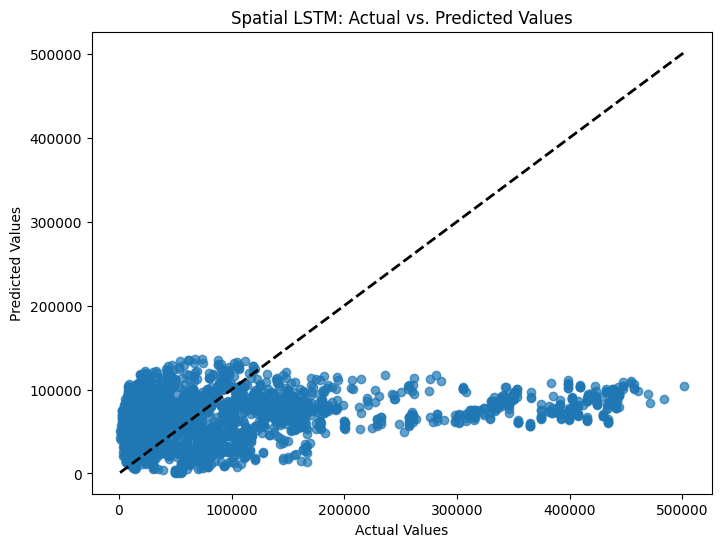

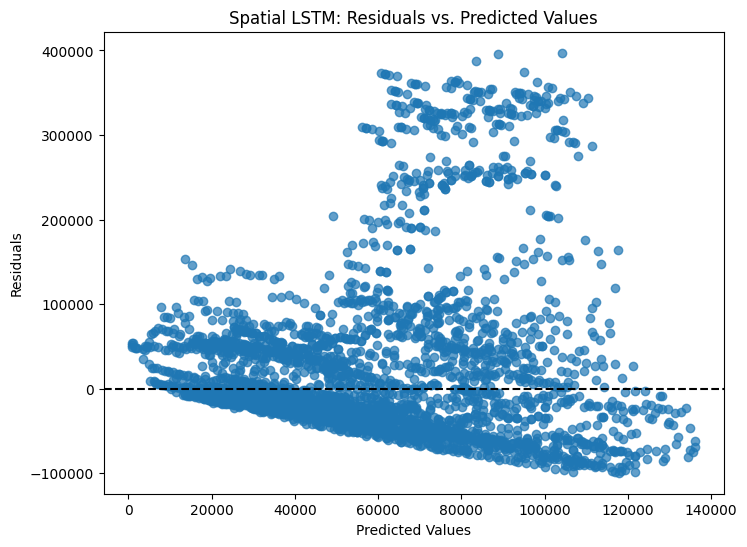

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


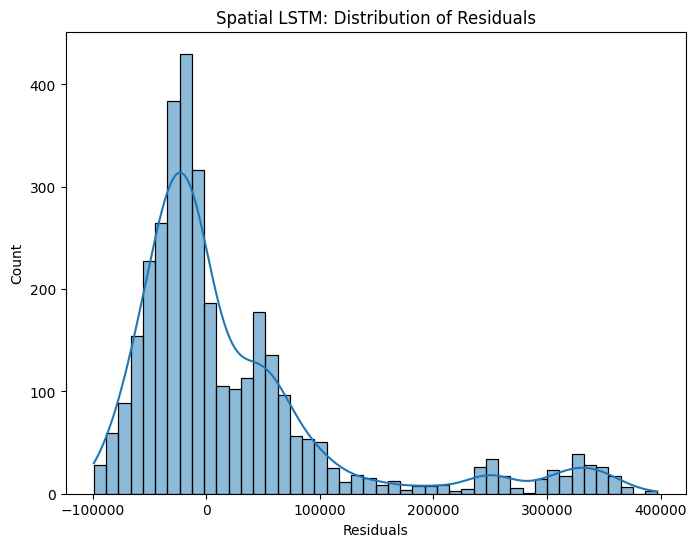

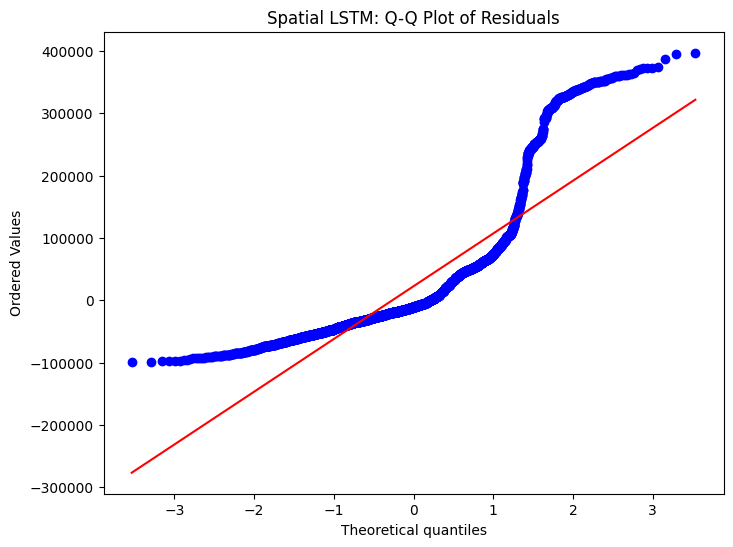

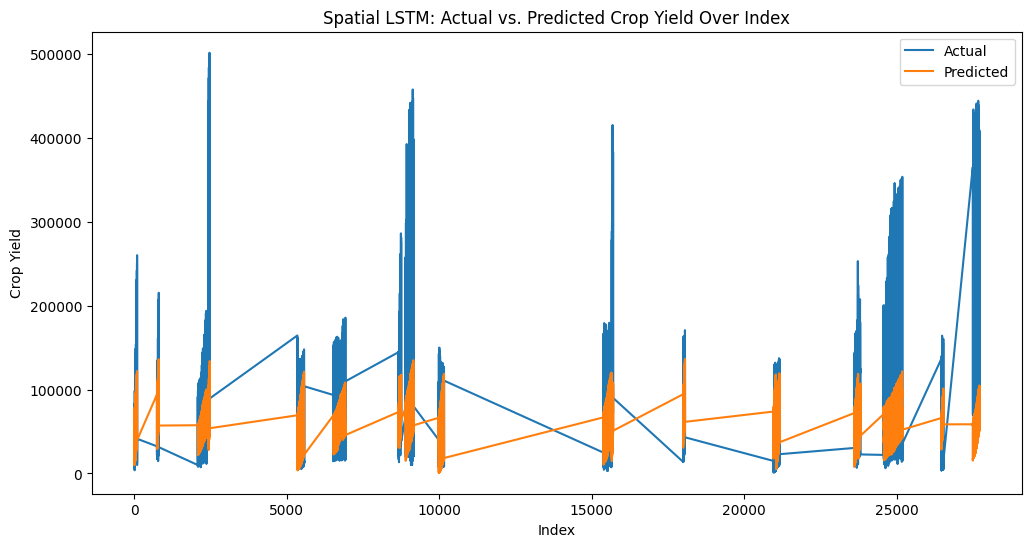

In [57]:
# Actual vs. Predicted Values (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(test_spatial_y_reshaped, predictions_lstm_spatial, alpha=0.7)
plt.plot([test_spatial_y_reshaped.min(), test_spatial_y_reshaped.max()], [test_spatial_y_reshaped.min(), test_spatial_y_reshaped.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Spatial LSTM: Actual vs. Predicted Values")
plt.show()

# Residuals vs. Predicted Values (Residual Plot)
residuals_lstm_spatial = test_spatial_y_reshaped - predictions_lstm_spatial
plt.figure(figsize=(8, 6))
plt.scatter(predictions_lstm_spatial, residuals_lstm_spatial, alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Spatial LSTM: Residuals vs. Predicted Values")
plt.show()

# Distribution of Residuals (Histogram or KDE)
plt.figure(figsize=(8, 6))
sns.histplot(residuals_lstm_spatial, kde=True)
plt.xlabel("Residuals")
plt.title("Spatial LSTM: Distribution of Residuals")
plt.show()

# Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(8, 6))
stats.probplot(residuals_lstm_spatial, dist="norm", plot=plt)
plt.title("Spatial LSTM: Q-Q Plot of Residuals")
plt.show()

# Prediction Error Plot
predictions_df_lstm_spatial = pd.DataFrame({'Actual': test_spatial_y_reshaped, 'Predicted': predictions_lstm_spatial}, index=test_spatial_y.index[:len(test_spatial_y_reshaped)])
plt.figure(figsize=(12, 6))
plt.plot(predictions_df_lstm_spatial['Actual'], label='Actual')
plt.plot(predictions_df_lstm_spatial['Predicted'], label='Predicted')
plt.xlabel("Index")  # Changed to Index
plt.ylabel("Crop Yield")
plt.title("Spatial LSTM: Actual vs. Predicted Crop Yield Over Index")
plt.legend()
plt.show()